#Show these results to Niklas

In this code patch intputs are t-1 lagged behind the outputs

In [ ]:
#@title
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## uploading my data
from google.colab import files
upload = files.upload()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


Saving market_returns.csv to market_returns.csv
Saving NOR.csv to NOR.csv


**Below we will upload the dependent variable**
The market returns

In [ ]:
#@title
# upload the market_returns.csv file
#from google.colab import files
#upload = files.upload()

Saving market_returns.csv to market_returns.csv


In [ ]:
#@title
mkt_ret = pd.read_csv('market_returns.csv') 
mkt_ret_array = mkt_ret.to_numpy()
# creating market returns for Norway
mkt_ret_nor = mkt_ret_array[20238:20658] # 420 datapoints
print(mkt_ret_nor)

[['NOR' '1986-01-31' 20 ... -0.043300105 -0.041851614 -0.048165105]
 ['NOR' '1986-02-28' 21 ... 0.045087506 0.0194531775 0.039791506]
 ['NOR' '1986-03-31' 21 ... -0.075401789 -0.067552459 -0.081364789]
 ...
 ['NOR' '2020-10-31' 255 ... -0.047197711 -0.06433862 -0.046003858]
 ['NOR' '2020-11-30' 268 ... 0.2901295107 0.2304916979 0.2874249084]
 ['NOR' '2020-12-31' 272 ... 0.1786583098 0.101887318 0.1785983098]]


**This part of the code processes the inputs of the model**

The inputs are the factor portfolio returns

For the next step we will create datasets. I will use the Norwegian data as an example. Repeat for different files

In [ ]:
#@title
data_nor = pd.read_csv('NOR.csv')  # change NOR.csv to upload a different file
# It is better to have my data uploaded to Google drive
# Look into https://faun.pub/how-to-load-datasets-on-google-colab-517514f6aac4#:~:text=Load%20datasets%20from%20your%20local%20device%20Go%20to,from%20google.colab%20import%20files%20upload%20%3D%20files.upload%20%28%29
data_nor.head()


,characteristic,direction,excntry,eom,signal,n_stocks,n_stocks_min,ret_ew,ret_vw,ret_vw_cap
0,age,-1,NOR,1989-04-30,-60.0,59,12,-0.054248,0.000656,-0.001969
1,age,-1,NOR,1989-05-31,-60.0,62,13,-0.001656,-0.026056,-0.048460
2,age,-1,NOR,1989-06-30,-60.0,82,20,-0.002219,0.011124,0.017617
3,age,-1,NOR,1989-07-31,-60.0,82,20,-0.008103,-0.004086,-0.028578
4,age,-1,NOR,1989-08-31,-60.0,83,20,-0.054664,-0.062421,-0.063199


The data i uploaded are on a Dataframe type. It needs to be converted to ndarray

In [ ]:
#@title
nor_array = data_nor.to_numpy() # important in order to be able to process data

In [ ]:
#@title
nor_array.shape

(50636, 10)

In [ ]:
#@title
nor_returns = nor_array[:,7:9]  

python skips one column/row in comparison with Matlab

**Problem i need to discuss with Niklas. The factor matrices do not have the same shape/size. Could this be a problem to our ANN algorithm?**

Our files have the factor data in one column. So in order to retrieve the factor returns and be able to divide the sample into 2 subsamples. We need to "break up" the sample into the factor subsamples for each country

Note for consideration: The code below is important in order to preprocess the data. It will be very long so maybe this colab file should only be used for the process of data.

Note 2: The factor matrices below do NOT have the same shape. Some portfolios have data for a longer period of time

In [ ]:
#@title
# 1)Norway
age_nor = nor_array[0:381]  # age factor portfolio 381 datapoints
#print(age_nor)
#print(age_nor[:,3]) # to show the starting age
print(age_nor[56:380,3]) # 1994-2020 checkpoint (324 datapoints)
age_nor94 = age_nor[56:380]

X = age_nor94[:,8] #ret_vw
#print(X)

X_df = pd.DataFrame(X) # This represents output or column: # ret_vw
X_df.columns = ['age (ret_vw)']
#X_df.insert(1, 'be_me_nor (ret_vw)', be_me_nor, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
aliq_at_nor = nor_array[381:737] # 356 datapoints
#print(aliq_at_nor)
print(aliq_at_nor[31:355,3]) # 1994-2020 checkpoint (324 datapoints)
aliq_at_nor94 = aliq_at_nor[31:355]
x_aliq_at_nor94 = aliq_at_nor94[:,8]

X_df.insert(1, 'aliq_at_nor94 (ret_vw)', x_aliq_at_nor94, True)
#print(X_df)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
aliq_mat_nor = nor_array[737:1093] # 356 datapoints
#print(aliq_mat_nor)
print(aliq_mat_nor[31:355,3]) # 1994-2020 checkpoint (324 datapoints)
aliq_mat_nor94 = aliq_mat_nor[31:355]

x_aliq_mat_nor94 = aliq_mat_nor94[:,8] # ret_vw

X_df.insert(1, 'aliq_mat_nor94 (ret_vw)', x_aliq_mat_nor94, True)
print(X_df)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
ami_126d_nor = nor_array[1093:1425] # 332 datapoints
#print(ami_126d_nor)
print(ami_126d_nor[7:331,3]) # 1994-2020 checkpoint (324 datapoints)
ami_126d_nor94 = ami_126d_nor[7:331]

x_ami_126d_nor94 = ami_126d_nor94[:,8]

X_df.insert(1, 'ami_126d_nor94 (ret_vw)', x_ami_126d_nor94, True)
print(X_df)

['1993-08-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
at_be_nor = nor_array[1425:1793] # 368 datapoints
#print(at_be_nor)
print(at_be_nor[43:367,3]) # 1994-2020 checkpoint (324 datapoints)
at_be_nor94 = at_be_nor[43:367]

x_at_be_nor94 = at_be_nor94[:,8]

X_df.insert(1, 'at_be_nor94 (ret_vw)', x_at_be_nor94, True)
print(X_df)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
at_gr1_nor = nor_array[1793:2149] # 356 datapoints
#print(at_gr1_nor)
print(at_gr1_nor[31:355,3]) # 1994-2020 checkpoint (324 datapoints)
at_gr1_nor94 = at_gr1_nor[31:355]

x_at_gr1_nor94 = at_gr1_nor94[:,8]

X_df.insert(1, 'at_gr1_nor94 (ret_vw)', x_at_gr1_nor94, True)
print(X_df)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
at_me_nor = nor_array[2149:2517] # 368 datapoints
#print(at_me_nor)
print(at_me_nor[43:367,3]) # 1994-2020 checkpoint (324 datapoints)
at_me_nor94 = at_me_nor[43:367]

x_at_me_nor94 = at_me_nor94[:,8]

X_df.insert(1, 'at_me_nor94 (ret_vw)', x_at_me_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
at_turnover_nor = nor_array[2517:2873] # 356 datapoints
#print(at_turnover_nor)
print(at_turnover_nor[31:355,3]) # 1994-2020 checkpoint (324 datapoints)
at_turnover_nor94 = at_turnover_nor[31:355]

x_at_turnover_nor94 = at_turnover_nor94[:,8]

X_df.insert(1, 'at_turnover_nor94 (ret_vw)', x_at_turnover_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
be_gr1a_nor = nor_array[2873:3229] # 356 datapoints
#print(be_gr1a_nor)
print(be_gr1a_nor[31:355,3]) # 1994-2020 checkpoint (324 datapoints)
be_gr1a_nor94 = be_gr1a_nor[31:355]

x_be_gr1a_nor94 = be_gr1a_nor94[:,8]

X_df.insert(1, 'be_gr1a_nor94 (ret_vw)', x_be_gr1a_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
be_me_nor = nor_array[3229:3597] # 368 datapoints
#print(be_me_nor)
print(be_me_nor[43:367,3]) # 1994-2020 checkpoint (324 datapoints)
be_me_nor94 = be_me_nor[43:367]

x_be_me_nor94 = be_me_nor94[:,8]

X_df.insert(1, 'be_me_nor94 (ret_vw)', x_be_me_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
beta_60m_nor = nor_array[3597:3980] # 383 datapoints
#print(beta_60m_nor)
print(beta_60m_nor[58:382,3]) # 1994-2020 checkpoint (324 datapoints)
beta_60m_nor94 = beta_60m_nor[58:382]

x_beta_60m_nor94 = beta_60m_nor94[:,8]

X_df.insert(1, 'beta_60m_nor94 (ret_vw)', x_beta_60m_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
beta_dimson_21d_nor = nor_array[3980:4397] # 417 datapoints
#print(beta_dimson_21d_nor)
print(beta_dimson_21d_nor[92:416,3]) # 1994-2020 checkpoint (324 datapoints)
beta_dimson_21d_nor94 = beta_dimson_21d_nor[92:416]

x_beta_dimson_21d_nor94 = beta_dimson_21d_nor94[:,8]

X_df.insert(1, 'beta_dimson_21d_nor94 (ret_vw)', x_beta_dimson_21d_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
betabab_1260d_nor = nor_array[4397:4771] # 374 datapoints
#print(betabab_1260d_nor)
print(betabab_1260d_nor[49:373,3]) # 1994-2020 checkpoint (324 datapoints)
betabab_1260d_nor94 = betabab_1260d_nor[49:373]

x_betabab_1260d_nor94 = betabab_1260d_nor94[:,8]

X_df.insert(1, 'betabab_1260d_nor94 (ret_vw)', x_betabab_1260d_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
betadown_252d_nor = nor_array[4771:5183] # 412 datapoints
#print(betadown_252d_nor)
print(betadown_252d_nor[87:411,3]) # 1994-2020 checkpoint (324 datapoints)
betadown_252d_nor94 = betadown_252d_nor[87:411]

x_betadown_252d_nor94 = betadown_252d_nor94[:,8]

X_df.insert(1, 'betadown_252d_nor94 (ret_vw)', x_betadown_252d_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
bev_mev_nor = nor_array[5183:5551] # 368 datapoints
#print(bev_mev_nor)
print(bev_mev_nor[43:367,3]) # 1994-2020 checkpoint (324 datapoints)
bev_mev_nor94 = bev_mev_nor[43:367]

x_bev_mev_nor94 = bev_mev_nor94[:,8]

X_df.insert(1, 'bev_mev_nor94 (ret_vw)', x_bev_mev_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
bidaskhl_21d_nor = nor_array[5551:5888] # 337 datapoints
#print(bidaskhl_21d_nor)
print(bidaskhl_21d_nor[12:336,3]) # 1994-2020 checkpoint (324 datapoints)
bidaskhl_21d_nor94 = bidaskhl_21d_nor[12:336]

x_bidaskhl_21d_nor94 = bidaskhl_21d_nor94[:,8]

X_df.insert(1, 'bidaskhl_21d_nor94 (ret_vw)', x_bidaskhl_21d_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
capex_abn_nor = nor_array[5888:6160] # 272 datapoints
#print(capex_abn_nor)
print(capex_abn_nor[0:272,3]) # first data 5/1998


['1998-05-31' '1998-06-30' '1998-07-31' '1998-08-31' '1998-09-30'
 '1998-10-31' '1998-11-30' '1998-12-31' '1999-01-31' '1999-02-28'
 '1999-03-31' '1999-04-30' '1999-05-31' '1999-06-30' '1999-07-31'
 '1999-08-31' '1999-09-30' '1999-10-31' '1999-11-30' '1999-12-31'
 '2000-01-31' '2000-02-29' '2000-03-31' '2000-04-30' '2000-05-31'
 '2000-06-30' '2000-07-31' '2000-08-31' '2000-09-30' '2000-10-31'
 '2000-11-30' '2000-12-31' '2001-01-31' '2001-02-28' '2001-03-31'
 '2001-04-30' '2001-05-31' '2001-06-30' '2001-07-31' '2001-08-31'
 '2001-09-30' '2001-10-31' '2001-11-30' '2001-12-31' '2002-01-31'
 '2002-02-28' '2002-03-31' '2002-04-30' '2002-05-31' '2002-06-30'
 '2002-07-31' '2002-08-31' '2002-09-30' '2002-10-31' '2002-11-30'
 '2002-12-31' '2003-01-31' '2003-02-28' '2003-03-31' '2003-04-30'
 '2003-05-31' '2003-06-30' '2003-07-31' '2003-08-31' '2003-09-30'
 '2003-10-31' '2003-11-30' '2003-12-31' '2004-01-31' '2004-02-29'
 '2004-03-31' '2004-04-30' '2004-05-31' '2004-06-30' '2004-07-31'
 '2004-08-

In [ ]:
#@title
capx_gr1_nor = nor_array[6160:6456] # 296 datapoints
#print(capx_gr1_nor)
print(capx_gr1_nor[0:296,3]) # first 5/1996


['1996-05-31' '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30'
 '1996-10-31' '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28'
 '1997-03-31' '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31'
 '1997-08-31' '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31'
 '1998-01-31' '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31'
 '1998-06-30' '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31'
 '1998-11-30' '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31'
 '1999-04-30' '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31'
 '1999-09-30' '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31'
 '2000-02-29' '2000-03-31' '2000-04-30' '2000-05-31' '2000-06-30'
 '2000-07-31' '2000-08-31' '2000-09-30' '2000-10-31' '2000-11-30'
 '2000-12-31' '2001-01-31' '2001-02-28' '2001-03-31' '2001-04-30'
 '2001-05-31' '2001-06-30' '2001-07-31' '2001-08-31' '2001-09-30'
 '2001-10-31' '2001-11-30' '2001-12-31' '2002-01-31' '2002-02-28'
 '2002-03-31' '2002-04-30' '2002-05-31' '2002-06-30' '2002-07-31'
 '2002-08-

In [ ]:
#@title
capx_gr2_nor = nor_array[6456:6740] # 284 datapoints
#print(capx_gr2_nor)
print(capx_gr2_nor[0:284,3]) # first 5/1997


['1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31' '1997-09-30'
 '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31' '1998-02-28'
 '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30' '1998-07-31'
 '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30' '1998-12-31'
 '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30' '1999-05-31'
 '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30' '1999-10-31'
 '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29' '2000-03-31'
 '2000-04-30' '2000-05-31' '2000-06-30' '2000-07-31' '2000-08-31'
 '2000-09-30' '2000-10-31' '2000-11-30' '2000-12-31' '2001-01-31'
 '2001-02-28' '2001-03-31' '2001-04-30' '2001-05-31' '2001-06-30'
 '2001-07-31' '2001-08-31' '2001-09-30' '2001-10-31' '2001-11-30'
 '2001-12-31' '2002-01-31' '2002-02-28' '2002-03-31' '2002-04-30'
 '2002-05-31' '2002-06-30' '2002-07-31' '2002-08-31' '2002-09-30'
 '2002-10-31' '2002-11-30' '2002-12-31' '2003-01-31' '2003-02-28'
 '2003-03-31' '2003-04-30' '2003-05-31' '2003-06-30' '2003-07-31'
 '2003-08-

In [ ]:
#@title
capx_gr3_nor = nor_array[6740:7012] # 272 datapoints
#print(capx_gr3_nor)
print(capx_gr3_nor[0:272,3]) # first 5/1998


['1998-05-31' '1998-06-30' '1998-07-31' '1998-08-31' '1998-09-30'
 '1998-10-31' '1998-11-30' '1998-12-31' '1999-01-31' '1999-02-28'
 '1999-03-31' '1999-04-30' '1999-05-31' '1999-06-30' '1999-07-31'
 '1999-08-31' '1999-09-30' '1999-10-31' '1999-11-30' '1999-12-31'
 '2000-01-31' '2000-02-29' '2000-03-31' '2000-04-30' '2000-05-31'
 '2000-06-30' '2000-07-31' '2000-08-31' '2000-09-30' '2000-10-31'
 '2000-11-30' '2000-12-31' '2001-01-31' '2001-02-28' '2001-03-31'
 '2001-04-30' '2001-05-31' '2001-06-30' '2001-07-31' '2001-08-31'
 '2001-09-30' '2001-10-31' '2001-11-30' '2001-12-31' '2002-01-31'
 '2002-02-28' '2002-03-31' '2002-04-30' '2002-05-31' '2002-06-30'
 '2002-07-31' '2002-08-31' '2002-09-30' '2002-10-31' '2002-11-30'
 '2002-12-31' '2003-01-31' '2003-02-28' '2003-03-31' '2003-04-30'
 '2003-05-31' '2003-06-30' '2003-07-31' '2003-08-31' '2003-09-30'
 '2003-10-31' '2003-11-30' '2003-12-31' '2004-01-31' '2004-02-29'
 '2004-03-31' '2004-04-30' '2004-05-31' '2004-06-30' '2004-07-31'
 '2004-08-

In [ ]:
#@title
cash_at_nor = nor_array[7012:7380] # 368 datapoints
#print(cash_at_nor)
#print(cash_at_nor[:,3])

print(cash_at_nor[43:367,3]) # 1994-2020 checkpoint (324 datapoints)
cash_at_nor94 = cash_at_nor[43:367]

x_cash_at_nor94 = cash_at_nor94[:,8]

X_df.insert(1, 'cash_at_nor94 (ret_vw)', x_cash_at_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
chcsho_12m_nor = nor_array[7380:7788] # 408 datapoints
#print(chcsho_12m_nor)
#print(chcsho_12m_nor[:,3])

print(chcsho_12m_nor[83:407,3]) # 1994-2020 checkpoint (324 datapoints)
chcsho_12m_nor94 = chcsho_12m_nor[83:407]

x_chcsho_12m_nor94 = chcsho_12m_nor94[:,8]

X_df.insert(1, 'chcsho_12m_nor94 (ret_vw)', x_chcsho_12m_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
coa_gr1a_nor = nor_array[7788:8144] # 356 datapoints
#print(coa_gr1a_nor)
#print(coa_gr1a_nor[:,3])

print(coa_gr1a_nor[31:355,3]) # 1994-2020 checkpoint (324 datapoints)
coa_gr1a_nor94 = coa_gr1a_nor[31:355]

x_coa_gr1a_nor94 = coa_gr1a_nor94[:,8]

X_df.insert(1, 'coa_gr1a_nor94 (ret_vw)', x_coa_gr1a_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
col_gr1a_nor = nor_array[8144:8500] # 356 datapoints
#print(col_gr1a_nor)
#print(col_gr1a_nor[:,3])

print(col_gr1a_nor[31:355,3]) # 1994-2020 checkpoint (324 datapoints)
col_gr1a_nor94 = col_gr1a_nor[31:355]

x_col_gr1a_nor94 = col_gr1a_nor94[:,8]

X_df.insert(1, 'col_gr1a_nor94 (ret_vw)', x_col_gr1a_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
cop_at_nor = nor_array[8500:8856] # 356 datapoints
#print(cop_at_nor)
#print(col_gr1a_nor[:,3])

print(cop_at_nor[31:355,3]) # 1994-2020 checkpoint (324 datapoints)
cop_at_nor94 = cop_at_nor[31:355]

x_cop_at_nor94 = cop_at_nor94[:,8]

X_df.insert(1, 'cop_at_nor94 (ret_vw)', x_cop_at_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
cop_atl_nor = nor_array[8856:9212] # 356 datapoints
#print(cop_atl_nor)
#print(cop_atl_nor[:,3])

print(cop_atl_nor[31:355,3]) # 1994-2020 checkpoint (324 datapoints)
cop_atl_nor94 = cop_atl_nor[31:355]

x_cop_atl_nor94 = cop_atl_nor94[:,8]

X_df.insert(1, 'cop_atl_nor94 (ret_vw)', x_cop_atl_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
corr_1260d_nor = nor_array[9212:9586] # 374 datapoints
#print(corr_1260d_nor)
#print(corr_1260d_nor[:,3])

print(corr_1260d_nor[49:373,3]) # 1994-2020 checkpoint (324 datapoints)
corr_1260d_nor94 = corr_1260d_nor[49:373]

x_corr_1260d_nor94 = corr_1260d_nor94[:,8]

X_df.insert(1, 'corr_1260d_nor94 (ret_vw)', x_corr_1260d_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
coskew_21d_nor = nor_array[9586:10003] # 417 datapoints
#print(coskew_21d_nor)
#print(coskew_21d_nor[:,3])

print(coskew_21d_nor[92:416,3]) # 1994-2020 checkpoint (324 datapoints)
coskew_21d_nor94 = coskew_21d_nor[92:416]

x_coskew_21d_nor94 = coskew_21d_nor94[:,8]

X_df.insert(1, 'coskew_21d_nor94 (ret_vw)', x_coskew_21d_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
cowc_gr1a_nor = nor_array[10003:10359] # 356 datapoints
#print(cowc_gr1a_nor)
#print(cowc_gr1a_nor[:,3])

print(cowc_gr1a_nor[31:355,3]) # 1994-2020 checkpoint (324 datapoints)
cowc_gr1a_nor94 = cowc_gr1a_nor[31:355]

x_cowc_gr1a_nor94 = cowc_gr1a_nor94[:,8]

X_df.insert(1, 'cowc_gr1a_nor94 (ret_vw)', x_cowc_gr1a_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
dbnetis_at_nor = nor_array[10359:10715] # 356 datapoints
#print(dbnetis_at_nor)
#print(dbnetis_at_nor[:,3])

print(dbnetis_at_nor[31:355,3]) # 1994-2020 checkpoint (324 datapoints)
dbnetis_at_nor94 = dbnetis_at_nor[31:355]

x_dbnetis_at_nor94 = dbnetis_at_nor94[:,8]

X_df.insert(1, 'dbnetis_at_nor94 (ret_vw)', x_dbnetis_at_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
debt_gr3_nor = nor_array[10715:11047] # 332 datapoints
#print(debt_gr3_nor)
#print(debt_gr3_nor[:,3])

print(debt_gr3_nor[7:331,3]) # 1994-2020 checkpoint (324 datapoints)
debt_gr3_nor94 = debt_gr3_nor[7:331]

x_debt_gr3_nor94 = debt_gr3_nor94[:,8]

X_df.insert(1, 'debt_gr3_nor94 (ret_vw)', x_debt_gr3_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
debt_me_nor = nor_array[11047:11415] # 368 datapoints
#print(debt_me_nor)
#print(debt_me_nor[:,3])

print(debt_me_nor[43:367,3]) # 1994-2020 checkpoint (324 datapoints)
debt_me_nor94 = debt_me_nor[43:367]

x_debt_me_nor94 = debt_me_nor94[:,8]

X_df.insert(1, 'debt_me_nor94 (ret_vw)', x_debt_me_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
dgp_dsale_nor = nor_array[11415:11750] # 335 datapoints
#print(dgp_dsale_nor)
#print(dgp_dsale_nor[:,3])

print(dgp_dsale_nor[10:334,3]) # 1994-2020 checkpoint (324 datapoints)
dgp_dsale_nor94 = dgp_dsale_nor[10:334]

x_dgp_dsale_nor94 = dgp_dsale_nor94[:,8]

X_df.insert(1, 'dgp_dsale_nor94 (ret_vw)', x_dgp_dsale_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
div12m_me_nor = nor_array[11750:12130] # 380 datapoints
#print(div12m_me_nor)
#print(div12m_me_nor[:,3])

print(div12m_me_nor[55:379,3]) # 1994-2020 checkpoint (324 datapoints)
div12m_me_nor94 = div12m_me_nor[55:379]

x_div12m_me_nor94 = div12m_me_nor94[:,8]

X_df.insert(1, 'div12m_me_nor94 (ret_vw)', x_div12m_me_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
dolvol_126d_nor = nor_array[12130:12462] # 332 datapoints
#print(dolvol_126d_nor)
#print(dolvol_126d_nor[:,3])

print(dolvol_126d_nor[7:331,3]) # 1994-2020 checkpoint (324 datapoints)
dolvol_126d_nor94 = dolvol_126d_nor[7:331]

x_dolvol_126d_nor94 = dolvol_126d_nor94[:,8]

X_df.insert(1, 'dolvol_126d_nor94 (ret_vw)', x_dolvol_126d_nor94, True)

['1993-08-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
dolvol_var_126d_nor = nor_array[12462:12794] # 332 datapoints
#print(dolvol_var_126d_nor)
#print(dolvol_var_126d_nor[:,3])

print(dolvol_var_126d_nor[7:331,3]) # 1994-2020 checkpoint (324 datapoints)
dolvol_var_126d_nor94 = dolvol_var_126d_nor[7:331]

x_dolvol_var_126d_nor94 = dolvol_var_126d_nor94[:,8]

X_df.insert(1, 'dolvol_var_126d_nor94 (ret_vw)', x_dolvol_var_126d_nor94, True)

['1993-08-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
dsale_dinv_nor = nor_array[12794:13138] # 344 datapoints
#print(dsale_dinv_nor)
#print(dsale_dinv_nor[:,3])

print(dsale_dinv_nor[19:343,3]) # 1994-2020 checkpoint (324 datapoints)
dsale_dinv_nor94 = dsale_dinv_nor[19:343]

x_dsale_dinv_nor94 = dsale_dinv_nor94[:,8]

X_df.insert(1, 'dsale_dinv_nor94 (ret_vw)', x_dsale_dinv_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
dsale_drec_nor = nor_array[13138:13482] # 344 datapoints
#print(dsale_drec_nor)
#print(dsale_drec_nor[:,3])

print(dsale_drec_nor[19:343,3]) # 1994-2020 checkpoint (324 datapoints)
dsale_drec_nor94 = dsale_drec_nor[19:343]

x_dsale_drec_nor94 = dsale_drec_nor94[:,8]

X_df.insert(1, 'dsale_drec_nor94 (ret_vw)', x_dsale_drec_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
dsale_dsga_nor = nor_array[13482:13646] # 164 datapoints
#print(dsale_dsga_nor)
#print(dsale_dsga_nor[:,3])

print(dsale_dsga_nor[0:164,3]) # first 5/2007

['2007-05-31' '2007-06-30' '2007-07-31' '2007-08-31' '2007-09-30'
 '2007-10-31' '2007-11-30' '2007-12-31' '2008-01-31' '2008-02-29'
 '2008-03-31' '2008-04-30' '2008-05-31' '2008-06-30' '2008-07-31'
 '2008-08-31' '2008-09-30' '2008-10-31' '2008-11-30' '2008-12-31'
 '2009-01-31' '2009-02-28' '2009-03-31' '2009-04-30' '2009-05-31'
 '2009-06-30' '2009-07-31' '2009-08-31' '2009-09-30' '2009-10-31'
 '2009-11-30' '2009-12-31' '2010-01-31' '2010-02-28' '2010-03-31'
 '2010-04-30' '2010-05-31' '2010-06-30' '2010-07-31' '2010-08-31'
 '2010-09-30' '2010-10-31' '2010-11-30' '2010-12-31' '2011-01-31'
 '2011-02-28' '2011-03-31' '2011-04-30' '2011-05-31' '2011-06-30'
 '2011-07-31' '2011-08-31' '2011-09-30' '2011-10-31' '2011-11-30'
 '2011-12-31' '2012-01-31' '2012-02-29' '2012-03-31' '2012-04-30'
 '2012-05-31' '2012-06-30' '2012-07-31' '2012-08-31' '2012-09-30'
 '2012-10-31' '2012-11-30' '2012-12-31' '2013-01-31' '2013-02-28'
 '2013-03-31' '2013-04-30' '2013-05-31' '2013-06-30' '2013-07-31'
 '2013-08-

In [ ]:
#@title
earnings_variability_nor = nor_array[13646:13954] # 308 datapoints
#print(earnings_variability_nor)
#print(earnings_variability_nor[:,3])

print(earnings_variability_nor[0:308,3]) # first 5/1995

['1995-05-31' '1995-06-30' '1995-07-31' '1995-08-31' '1995-09-30'
 '1995-10-31' '1995-11-30' '1995-12-31' '1996-01-31' '1996-02-29'
 '1996-03-31' '1996-04-30' '1996-05-31' '1996-06-30' '1996-07-31'
 '1996-08-31' '1996-09-30' '1996-10-31' '1996-11-30' '1996-12-31'
 '1997-01-31' '1997-02-28' '1997-03-31' '1997-04-30' '1997-05-31'
 '1997-06-30' '1997-07-31' '1997-08-31' '1997-09-30' '1997-10-31'
 '1997-11-30' '1997-12-31' '1998-01-31' '1998-02-28' '1998-03-31'
 '1998-04-30' '1998-05-31' '1998-06-30' '1998-07-31' '1998-08-31'
 '1998-09-30' '1998-10-31' '1998-11-30' '1998-12-31' '1999-01-31'
 '1999-02-28' '1999-03-31' '1999-04-30' '1999-05-31' '1999-06-30'
 '1999-07-31' '1999-08-31' '1999-09-30' '1999-10-31' '1999-11-30'
 '1999-12-31' '2000-01-31' '2000-02-29' '2000-03-31' '2000-04-30'
 '2000-05-31' '2000-06-30' '2000-07-31' '2000-08-31' '2000-09-30'
 '2000-10-31' '2000-11-30' '2000-12-31' '2001-01-31' '2001-02-28'
 '2001-03-31' '2001-04-30' '2001-05-31' '2001-06-30' '2001-07-31'
 '2001-08-

In [ ]:
#@title
ebit_bev_nor = nor_array[13954:14322] # 368 datapoints
#print(ebit_bev_nor)
#print(ebit_bev_nor[:,3])

print(ebit_bev_nor[43:367,3]) # 1994-2020 checkpoint (324 datapoints)
ebit_bev_nor94 = ebit_bev_nor[43:367]

x_ebit_bev_nor94 = ebit_bev_nor94[:,8]

X_df.insert(1, 'ebit_bev_nor94 (ret_vw)', x_ebit_bev_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
ebit_sale_nor = nor_array[14322:14690] # 368 datapoints
#print(ebit_sale_nor)
#print(ebit_sale_nor[:,3])

print(ebit_sale_nor[43:367,3]) # 1994-2020 checkpoint (324 datapoints)
ebit_sale_nor94 = ebit_sale_nor[43:367]

x_ebit_sale_nor94 = ebit_sale_nor94[:,8]

X_df.insert(1, 'ebit_sale_nor94 (ret_vw)', x_ebit_sale_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
ebitda_mev_nor = nor_array[14690:15058] # 368 datapoints
#print(ebitda_mev_nor)
#print(ebitda_mev_nor[:,3])

print(ebitda_mev_nor[43:367,3]) # 1994-2020 checkpoint (324 datapoints)
ebitda_mev_nor94 = ebitda_mev_nor[43:367]

x_ebitda_mev_nor94 = ebitda_mev_nor94[:,8]

X_df.insert(1, 'ebitda_mev_nor94 (ret_vw)', x_ebitda_mev_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
emp_gr1_nor = nor_array[15058:15414] # 356 datapoints
#print(emp_gr1_nor)
#print(emp_gr1_nor[:,3])

print(emp_gr1_nor[31:355,3]) # 1994-2020 checkpoint (324 datapoints)
emp_gr1_nor94 = emp_gr1_nor[31:355]

x_emp_gr1_nor94 = emp_gr1_nor94[:,8]

X_df.insert(1, 'emp_gr1_nor94 (ret_vw)', x_emp_gr1_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
eq_dur_nor = nor_array[15414:15770] # 356 datapoints
#print(eq_dur_nor)
#print(eq_dur_nor[:,3])

print(eq_dur_nor[31:355,3]) # 1994-2020 checkpoint (324 datapoints)
eq_dur_nor94 = eq_dur_nor[31:355]

x_eq_dur_nor94 = eq_dur_nor94[:,8]

X_df.insert(1, 'eq_dur_nor94 (ret_vw)', x_eq_dur_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
eqnetis_at_nor = nor_array[15770:16078] # 308 datapoints
#print(eqnetis_at_nor)
#print(eqnetis_at_nor[:,3])

print(eqnetis_at_nor[0:308,3]) # first 5/1995

['1995-05-31' '1995-06-30' '1995-07-31' '1995-08-31' '1995-09-30'
 '1995-10-31' '1995-11-30' '1995-12-31' '1996-01-31' '1996-02-29'
 '1996-03-31' '1996-04-30' '1996-05-31' '1996-06-30' '1996-07-31'
 '1996-08-31' '1996-09-30' '1996-10-31' '1996-11-30' '1996-12-31'
 '1997-01-31' '1997-02-28' '1997-03-31' '1997-04-30' '1997-05-31'
 '1997-06-30' '1997-07-31' '1997-08-31' '1997-09-30' '1997-10-31'
 '1997-11-30' '1997-12-31' '1998-01-31' '1998-02-28' '1998-03-31'
 '1998-04-30' '1998-05-31' '1998-06-30' '1998-07-31' '1998-08-31'
 '1998-09-30' '1998-10-31' '1998-11-30' '1998-12-31' '1999-01-31'
 '1999-02-28' '1999-03-31' '1999-04-30' '1999-05-31' '1999-06-30'
 '1999-07-31' '1999-08-31' '1999-09-30' '1999-10-31' '1999-11-30'
 '1999-12-31' '2000-01-31' '2000-02-29' '2000-03-31' '2000-04-30'
 '2000-05-31' '2000-06-30' '2000-07-31' '2000-08-31' '2000-09-30'
 '2000-10-31' '2000-11-30' '2000-12-31' '2001-01-31' '2001-02-28'
 '2001-03-31' '2001-04-30' '2001-05-31' '2001-06-30' '2001-07-31'
 '2001-08-

In [ ]:
#@title
eqnpo_12m_nor = nor_array[16078:16486] # 408 datapoints
#print(eqnpo_12m_nor)
#print(eqnpo_12m_nor[:,3])

print(eqnpo_12m_nor[83:407,3]) # 1994-2020 (324 points)
eqnpo_12m_nor94 = eqnpo_12m_nor[83:407]

x_eqnpo_12m_nor94 = eqnpo_12m_nor94[:,8]

X_df.insert(1, 'eqnpo_12m_nor94 (ret_vw)', x_eqnpo_12m_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
eqnpo_me_nor = nor_array[16486:16794] # 308 datapoints
#print(eqnpo_me_nor)
#print(eqnpo_me_nor[:,3])

print(eqnpo_me_nor[0:308,3]) # first 5/1995


['1995-05-31' '1995-06-30' '1995-07-31' '1995-08-31' '1995-09-30'
 '1995-10-31' '1995-11-30' '1995-12-31' '1996-01-31' '1996-02-29'
 '1996-03-31' '1996-04-30' '1996-05-31' '1996-06-30' '1996-07-31'
 '1996-08-31' '1996-09-30' '1996-10-31' '1996-11-30' '1996-12-31'
 '1997-01-31' '1997-02-28' '1997-03-31' '1997-04-30' '1997-05-31'
 '1997-06-30' '1997-07-31' '1997-08-31' '1997-09-30' '1997-10-31'
 '1997-11-30' '1997-12-31' '1998-01-31' '1998-02-28' '1998-03-31'
 '1998-04-30' '1998-05-31' '1998-06-30' '1998-07-31' '1998-08-31'
 '1998-09-30' '1998-10-31' '1998-11-30' '1998-12-31' '1999-01-31'
 '1999-02-28' '1999-03-31' '1999-04-30' '1999-05-31' '1999-06-30'
 '1999-07-31' '1999-08-31' '1999-09-30' '1999-10-31' '1999-11-30'
 '1999-12-31' '2000-01-31' '2000-02-29' '2000-03-31' '2000-04-30'
 '2000-05-31' '2000-06-30' '2000-07-31' '2000-08-31' '2000-09-30'
 '2000-10-31' '2000-11-30' '2000-12-31' '2001-01-31' '2001-02-28'
 '2001-03-31' '2001-04-30' '2001-05-31' '2001-06-30' '2001-07-31'
 '2001-08-

In [ ]:
#@title
eqpo_me_nor = nor_array[16794:17102] # 308 datapoints
#print(eqpo_me_nor)
#print(eqpo_me_nor[:,3])

print(eqpo_me_nor[0:308,3]) # first 5/1995

['1995-05-31' '1995-06-30' '1995-07-31' '1995-08-31' '1995-09-30'
 '1995-10-31' '1995-11-30' '1995-12-31' '1996-01-31' '1996-02-29'
 '1996-03-31' '1996-04-30' '1996-05-31' '1996-06-30' '1996-07-31'
 '1996-08-31' '1996-09-30' '1996-10-31' '1996-11-30' '1996-12-31'
 '1997-01-31' '1997-02-28' '1997-03-31' '1997-04-30' '1997-05-31'
 '1997-06-30' '1997-07-31' '1997-08-31' '1997-09-30' '1997-10-31'
 '1997-11-30' '1997-12-31' '1998-01-31' '1998-02-28' '1998-03-31'
 '1998-04-30' '1998-05-31' '1998-06-30' '1998-07-31' '1998-08-31'
 '1998-09-30' '1998-10-31' '1998-11-30' '1998-12-31' '1999-01-31'
 '1999-02-28' '1999-03-31' '1999-04-30' '1999-05-31' '1999-06-30'
 '1999-07-31' '1999-08-31' '1999-09-30' '1999-10-31' '1999-11-30'
 '1999-12-31' '2000-01-31' '2000-02-29' '2000-03-31' '2000-04-30'
 '2000-05-31' '2000-06-30' '2000-07-31' '2000-08-31' '2000-09-30'
 '2000-10-31' '2000-11-30' '2000-12-31' '2001-01-31' '2001-02-28'
 '2001-03-31' '2001-04-30' '2001-05-31' '2001-06-30' '2001-07-31'
 '2001-08-

In [ ]:
#@title
f_score_nor = nor_array[17102:17437] # 335 datapoints
#print(f_score_nor)
#print(f_score_nor[:,3])

print(f_score_nor[10:334,3]) # 1994-2020 (324 points)
f_score_nor94 = f_score_nor[10:334]

x_f_score_nor94 = f_score_nor94[:,8]

X_df.insert(1, 'f_score_nor94 (ret_vw)', x_f_score_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
fcf_me_nor = nor_array[17437:17745] # 308 datapoints
#print(fcf_me_nor)
#print(fcf_me_nor[:,3])

print(fcf_me_nor[0:308,3]) # first 5/1995

['1995-05-31' '1995-06-30' '1995-07-31' '1995-08-31' '1995-09-30'
 '1995-10-31' '1995-11-30' '1995-12-31' '1996-01-31' '1996-02-29'
 '1996-03-31' '1996-04-30' '1996-05-31' '1996-06-30' '1996-07-31'
 '1996-08-31' '1996-09-30' '1996-10-31' '1996-11-30' '1996-12-31'
 '1997-01-31' '1997-02-28' '1997-03-31' '1997-04-30' '1997-05-31'
 '1997-06-30' '1997-07-31' '1997-08-31' '1997-09-30' '1997-10-31'
 '1997-11-30' '1997-12-31' '1998-01-31' '1998-02-28' '1998-03-31'
 '1998-04-30' '1998-05-31' '1998-06-30' '1998-07-31' '1998-08-31'
 '1998-09-30' '1998-10-31' '1998-11-30' '1998-12-31' '1999-01-31'
 '1999-02-28' '1999-03-31' '1999-04-30' '1999-05-31' '1999-06-30'
 '1999-07-31' '1999-08-31' '1999-09-30' '1999-10-31' '1999-11-30'
 '1999-12-31' '2000-01-31' '2000-02-29' '2000-03-31' '2000-04-30'
 '2000-05-31' '2000-06-30' '2000-07-31' '2000-08-31' '2000-09-30'
 '2000-10-31' '2000-11-30' '2000-12-31' '2001-01-31' '2001-02-28'
 '2001-03-31' '2001-04-30' '2001-05-31' '2001-06-30' '2001-07-31'
 '2001-08-

In [ ]:
#@title
fnl_gr1a_nor = nor_array[17745:18101] # 356 datapoints
#print(fnl_gr1a_nor)
#print(fnl_gr1a_nor[:,3])

print(fnl_gr1a_nor[31:355,3]) # 1994-2020 (324 points)
fnl_gr1a_nor94 = fnl_gr1a_nor[31:355]

x_fnl_gr1a_nor94 = fnl_gr1a_nor94[:,8]

X_df.insert(1, 'fnl_gr1a_nor94 (ret_vw)', x_fnl_gr1a_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
gp_at_nor = nor_array[18101:18460] # 359 datapoints
#print(gp_at_nor)
#print(gp_at_nor[:,3])

print(gp_at_nor[34:358,3]) # 1994-2020 (324 points)
gp_at_nor94 = gp_at_nor[34:358]

x_gp_at_nor94 = gp_at_nor94[:,8]

X_df.insert(1, 'gp_at_nor94 (ret_vw)', x_gp_at_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
gp_atl1_nor = nor_array[18460:18807] # 347 datapoints
#print(gp_atl1_nor)
#print(gp_atl1_nor[:,3])

print(gp_atl1_nor[22:346,3]) # 1994-2020 (324 points)
gp_atl1_nor94 = gp_atl1_nor[22:346]

x_gp_atl1_nor94 = gp_atl1_nor94[:,8]

X_df.insert(1, 'gp_atl1_nor94 (ret_vw)', x_gp_atl1_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
intrinsic_value_nor = nor_array[18807:19151] # 344 datapoints
#print(intrinsic_value_nor)
#print(intrinsic_value_nor[:,3])

print(intrinsic_value_nor[19:343,3]) # 1994-2020 (324 points)
intrinsic_value_nor94 = intrinsic_value_nor[19:343]

x_intrinsic_value_nor94 = intrinsic_value_nor94[:,8]

X_df.insert(1, 'intrinsic_value_nor94 (ret_vw)', x_intrinsic_value_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
inv_gr1_nor = nor_array[19151:19507] # 356 datapoints
#print(inv_gr1_nor)
#print(inv_gr1_nor[:,3])

print(inv_gr1_nor[31:355,3]) # 1994-2020 (324 points)
inv_gr1_nor94 = inv_gr1_nor[31:355]

x_inv_gr1_nor94 = inv_gr1_nor94[:,8]

X_df.insert(1, 'inv_gr1_nor94 (ret_vw)', x_inv_gr1_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
inv_gr1a_nor = nor_array[19507:19863] # 356 datapoints
#print(inv_gr1a_nor)
#print(inv_gr1a_nor[:,3])

print(inv_gr1a_nor[31:355,3]) # 1994-2020 (324 points)
inv_gr1a_nor94 = inv_gr1a_nor[31:355]

x_inv_gr1a_nor94 = inv_gr1a_nor94[:,8]

X_df.insert(1, 'inv_gr1_nor94 (ret_vw)', x_inv_gr1_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
iskew_capm_21d_nor = nor_array[19863:20280] # 417 datapoints
#print(iskew_capm_21d_nor)
#print(iskew_capm_21d_nor[:,3])

print(iskew_capm_21d_nor[92:416,3]) # 1994-2020 (324 points)
iskew_capm_21d_nor94 = iskew_capm_21d_nor[92:416]

x_iskew_capm_21d_nor94 = iskew_capm_21d_nor94[:,8]

X_df.insert(1, 'iskew_capm_21d_nor94 (ret_vw)', x_iskew_capm_21d_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
iskew_ff3_21d_nor = nor_array[20280:20453] # 173 datapoints
#print(iskew_ff3_21d_nor)
#print(iskew_ff3_21d_nor[:,3])

print(iskew_ff3_21d_nor[0:173,3]) # first 9/1994 irregular data


['1994-09-30' '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30'
 '1995-07-31' '1995-08-31' '1995-09-30' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-07-31' '1996-12-31' '1997-01-31' '1997-02-28'
 '1997-03-31' '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31'
 '1997-08-31' '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31'
 '1998-01-31' '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31'
 '1998-06-30' '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31'
 '1998-11-30' '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31'
 '1999-04-30' '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31'
 '1999-09-30' '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31'
 '2000-02-29' '2000-03-31' '2000-04-30' '2000-05-31' '2000-06-30'
 '2000-07-31' '2000-08-31' '2000-09-30' '2000-10-31' '2000-11-30'
 '2000-12-31' '2001-02-28' '2002-10-31' '2002-11-30' '2005-07-31'
 '2005-08-31' '2005-09-30' '2005-10-31' '2005-11-30' '2005-12-31'
 '2006-01-31' '2006-02-28' '2006-03-31' '2006-04-30' '2006-05-31'
 '2006-06-

In [ ]:
#@title
iskew_hxz4_21d_nor = nor_array[20453:20552] # 99 datapoints
#print(iskew_hxz4_21d_nor)
#print(iskew_hxz4_21d_nor[:,3])

print(iskew_hxz4_21d_nor[0:99,3]) # first 11/2005 irregular data


['2005-11-30' '2006-02-28' '2006-05-31' '2006-08-31' '2006-09-30'
 '2006-10-31' '2006-11-30' '2006-12-31' '2007-01-31' '2007-02-28'
 '2007-03-31' '2007-04-30' '2007-05-31' '2007-06-30' '2007-07-31'
 '2007-08-31' '2007-09-30' '2007-10-31' '2007-11-30' '2008-06-30'
 '2008-07-31' '2009-04-30' '2009-05-31' '2009-06-30' '2009-07-31'
 '2009-08-31' '2009-09-30' '2009-10-31' '2009-11-30' '2009-12-31'
 '2010-01-31' '2010-02-28' '2010-03-31' '2010-04-30' '2010-05-31'
 '2010-12-31' '2011-01-31' '2011-02-28' '2011-03-31' '2011-04-30'
 '2011-05-31' '2011-12-31' '2012-01-31' '2012-03-31' '2012-05-31'
 '2012-06-30' '2012-07-31' '2012-08-31' '2012-09-30' '2012-10-31'
 '2012-11-30' '2012-12-31' '2013-01-31' '2013-02-28' '2013-05-31'
 '2013-12-31' '2014-03-31' '2014-04-30' '2014-05-31' '2014-06-30'
 '2014-07-31' '2014-08-31' '2014-09-30' '2017-02-28' '2017-03-31'
 '2017-04-30' '2017-07-31' '2017-08-31' '2018-02-28' '2018-03-31'
 '2018-04-30' '2018-05-31' '2018-06-30' '2018-07-31' '2018-08-31'
 '2018-09-

In [ ]:
#@title
ivol_capm_21d_nor = nor_array[20552:20969] # 417 datapoints
#print(ivol_capm_21d_nor)
#print(ivol_capm_21d_nor[:,3])

print(ivol_capm_21d_nor[92:416,3]) # 1994-2020 (324 points)
ivol_capm_21d_nor94 = ivol_capm_21d_nor[92:416]

x_ivol_capm_21d_nor94 = ivol_capm_21d_nor94[:,8]

X_df.insert(1, 'ivol_capm_21d_nor94 (ret_vw)', x_ivol_capm_21d_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
ivol_capm_252d_nor = nor_array[20969:21381] # 412 datapoints
#print(ivol_capm_252d_nor)
#print(ivol_capm_252d_nor[:,3])

print(ivol_capm_252d_nor[87:411,3]) # 1994-2020 (324 points)
ivol_capm_252d_nor94 = ivol_capm_252d_nor[87:411]

x_ivol_capm_252d_nor94 = ivol_capm_252d_nor94[:,8]

X_df.insert(1, 'ivol_capm_252d_nor94 (ret_vw)', x_ivol_capm_252d_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
ivol_ff3_21d_nor = nor_array[21381:21554] # 173 datapoints
#print(ivol_ff3_21d_nor)
#print(ivol_ff3_21d_nor[:,3])

print(ivol_ff3_21d_nor[0:173,3]) # first 9/1994 irregular data


['1994-09-30' '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30'
 '1995-07-31' '1995-08-31' '1995-09-30' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-07-31' '1996-12-31' '1997-01-31' '1997-02-28'
 '1997-03-31' '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31'
 '1997-08-31' '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31'
 '1998-01-31' '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31'
 '1998-06-30' '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31'
 '1998-11-30' '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31'
 '1999-04-30' '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31'
 '1999-09-30' '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31'
 '2000-02-29' '2000-03-31' '2000-04-30' '2000-05-31' '2000-06-30'
 '2000-07-31' '2000-08-31' '2000-09-30' '2000-10-31' '2000-11-30'
 '2000-12-31' '2001-02-28' '2002-10-31' '2002-11-30' '2005-07-31'
 '2005-08-31' '2005-09-30' '2005-10-31' '2005-11-30' '2005-12-31'
 '2006-01-31' '2006-02-28' '2006-03-31' '2006-04-30' '2006-05-31'
 '2006-06-

In [ ]:
#@title
ivol_hxz4_21d_nor = nor_array[21554:21653] # 99 datapoints
#print(ivol_hxz4_21d_nor)
#print(ivol_hxz4_21d_nor[:,3])

print(ivol_hxz4_21d_nor[0:99,3]) # first 11/2005 irregular data


['2005-11-30' '2006-02-28' '2006-05-31' '2006-08-31' '2006-09-30'
 '2006-10-31' '2006-11-30' '2006-12-31' '2007-01-31' '2007-02-28'
 '2007-03-31' '2007-04-30' '2007-05-31' '2007-06-30' '2007-07-31'
 '2007-08-31' '2007-09-30' '2007-10-31' '2007-11-30' '2008-06-30'
 '2008-07-31' '2009-04-30' '2009-05-31' '2009-06-30' '2009-07-31'
 '2009-08-31' '2009-09-30' '2009-10-31' '2009-11-30' '2009-12-31'
 '2010-01-31' '2010-02-28' '2010-03-31' '2010-04-30' '2010-05-31'
 '2010-12-31' '2011-01-31' '2011-02-28' '2011-03-31' '2011-04-30'
 '2011-05-31' '2011-12-31' '2012-01-31' '2012-03-31' '2012-05-31'
 '2012-06-30' '2012-07-31' '2012-08-31' '2012-09-30' '2012-10-31'
 '2012-11-30' '2012-12-31' '2013-01-31' '2013-02-28' '2013-05-31'
 '2013-12-31' '2014-03-31' '2014-04-30' '2014-05-31' '2014-06-30'
 '2014-07-31' '2014-08-31' '2014-09-30' '2017-02-28' '2017-03-31'
 '2017-04-30' '2017-07-31' '2017-08-31' '2018-02-28' '2018-03-31'
 '2018-04-30' '2018-05-31' '2018-06-30' '2018-07-31' '2018-08-31'
 '2018-09-

In [ ]:
#@title
kz_index_nor = nor_array[21653:22008] # 355 datapoints
#print(kz_index_nor)
#print(kz_index_nor[:,3])

print(kz_index_nor[30:354,3]) # 1994-2020 (324 points)
kz_index_nor94 = kz_index_nor[30:354]

x_kz_index_nor94 = kz_index_nor94[:,8]

X_df.insert(1, 'kz_index_nor94 (ret_vw)', x_kz_index_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
lnoa_gr1a_nor = nor_array[22008:22364] # 356 datapoints
#print(lnoa_gr1a_nor)
#print(lnoa_gr1a_nor[:,3])

print(lnoa_gr1a_nor[31:355,3]) # 1994-2020 (324 points)
lnoa_gr1a_nor94 = lnoa_gr1a_nor[31:355]

x_lnoa_gr1a_nor94 = lnoa_gr1a_nor94[:,8]

X_df.insert(1, 'lnoa_gr1a_nor94 (ret_vw)', x_lnoa_gr1a_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
lti_gr1a_nor = nor_array[22364:22720] # 356 datapoints
#print(lti_gr1a_nor)
#print(lti_gr1a_nor[:,3])

print(lti_gr1a_nor[31:355,3]) # 1994-2020 (324 points)
lti_gr1a_nor94 = lti_gr1a_nor[31:355]

x_lti_gr1a_nor94 = lti_gr1a_nor94[:,8]

X_df.insert(1, 'lti_gr1a_nor94 (ret_vw)', x_lti_gr1a_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
market_equity_nor = nor_array[22720:23140] # 420 datapoints
#print(market_equity_nor)
#print(market_equity_nor[:,3])

print(market_equity_nor[95:419,3]) # 1994-2020 (324 points)
market_equity_nor94 = market_equity_nor[95:419]

x_market_equity_nor94 = market_equity_nor94[:,8]

X_df.insert(1, 'market_equity_nor94 (ret_vw)', x_market_equity_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
mispricing_mgmt_nor = nor_array[23140:23496] # 356 datapoints
#print(mispricing_mgmt_nor)
#print(mispricing_mgmt_nor[:,3])

print(mispricing_mgmt_nor[31:355,3]) # 1994-2020 (324 points)
mispricing_mgmt_nor94 = mispricing_mgmt_nor[31:355]

x_mispricing_mgmt_nor94 = mispricing_mgmt_nor94[:,8]

X_df.insert(1, 'mispricing_mgmt_nor94 (ret_vw)', x_mispricing_mgmt_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
mispricing_perf_nor = nor_array[23496:23904] # 408 datapoints
#print(mispricing_perf_nor)
#print(mispricing_perf_nor[:,3])

print(mispricing_perf_nor[83:407,3]) # 1994-2020 (324 points)
mispricing_perf_nor94 = mispricing_perf_nor[83:407]

x_mispricing_perf_nor94 = mispricing_perf_nor94[:,8]

X_df.insert(1, 'mispricing_perf_nor94 (ret_vw)', x_mispricing_perf_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
ncoa_gr1a_nor = nor_array[23904:24260] # 356 datapoints
#print(ncoa_gr1a_nor)
#print(ncoa_gr1a_nor[:,3])

print(ncoa_gr1a_nor[31:355,3]) # 1994-2020 (324 points)
ncoa_gr1a_nor94 = ncoa_gr1a_nor[31:355]

x_ncoa_gr1a_nor94 = ncoa_gr1a_nor94[:,8]

X_df.insert(1, 'ncoa_gr1a_nor94 (ret_vw)', x_ncoa_gr1a_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
ncol_gr1a_nor = nor_array[24260:24616] # 356 datapoints
#print(ncol_gr1a_nor)
#print(ncol_gr1a_nor[:,3])

print(ncol_gr1a_nor[31:355,3]) # 1994-2020 (324 points)
ncol_gr1a_nor94 = ncol_gr1a_nor[31:355]

x_ncol_gr1a_nor94 = ncol_gr1a_nor94[:,8]

X_df.insert(1, 'ncol_gr1a_nor94 (ret_vw)', x_ncol_gr1a_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
netdebt_me_nor = nor_array[24616:24984] # 368 datapoints
#print(netdebt_me_nor)
#print(netdebt_me_nor[:,3])

print(netdebt_me_nor[43:367,3]) # 1994-2020 (324 points)
netdebt_me_nor94 = netdebt_me_nor[43:367]

x_netdebt_me_nor94 = netdebt_me_nor94[:,8]

X_df.insert(1, 'netdebt_me_nor94 (ret_vw)', x_netdebt_me_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
netis_at_nor = nor_array[24984:25292] # 308 datapoints
#print(netis_at_nor)
#print(netis_at_nor[:,3])

print(netis_at_nor[0:308,3]) # first 5/1995


['1995-05-31' '1995-06-30' '1995-07-31' '1995-08-31' '1995-09-30'
 '1995-10-31' '1995-11-30' '1995-12-31' '1996-01-31' '1996-02-29'
 '1996-03-31' '1996-04-30' '1996-05-31' '1996-06-30' '1996-07-31'
 '1996-08-31' '1996-09-30' '1996-10-31' '1996-11-30' '1996-12-31'
 '1997-01-31' '1997-02-28' '1997-03-31' '1997-04-30' '1997-05-31'
 '1997-06-30' '1997-07-31' '1997-08-31' '1997-09-30' '1997-10-31'
 '1997-11-30' '1997-12-31' '1998-01-31' '1998-02-28' '1998-03-31'
 '1998-04-30' '1998-05-31' '1998-06-30' '1998-07-31' '1998-08-31'
 '1998-09-30' '1998-10-31' '1998-11-30' '1998-12-31' '1999-01-31'
 '1999-02-28' '1999-03-31' '1999-04-30' '1999-05-31' '1999-06-30'
 '1999-07-31' '1999-08-31' '1999-09-30' '1999-10-31' '1999-11-30'
 '1999-12-31' '2000-01-31' '2000-02-29' '2000-03-31' '2000-04-30'
 '2000-05-31' '2000-06-30' '2000-07-31' '2000-08-31' '2000-09-30'
 '2000-10-31' '2000-11-30' '2000-12-31' '2001-01-31' '2001-02-28'
 '2001-03-31' '2001-04-30' '2001-05-31' '2001-06-30' '2001-07-31'
 '2001-08-

In [ ]:
#@title
nfna_gr1a_nor = nor_array[25292:25648] # 356 datapoints
#print(nfna_gr1a_nor)
#print(nfna_gr1a_nor[:,3])

print(nfna_gr1a_nor[31:355,3]) # 1994-2020 (324 points)
nfna_gr1a_nor94 = nfna_gr1a_nor[31:355]

x_nfna_gr1a_nor94 = nfna_gr1a_nor94[:,8]

X_df.insert(1, 'nfna_gr1a_nor94 (ret_vw)', x_nfna_gr1a_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
ni_ar1_nor = nor_array[25648:25956] # 308 datapoints
#print(ni_ar1_nor)
#print(ni_ar1_nor[:,3])

print(ni_ar1_nor[0:308,3]) # first 5/1995


['1995-05-31' '1995-06-30' '1995-07-31' '1995-08-31' '1995-09-30'
 '1995-10-31' '1995-11-30' '1995-12-31' '1996-01-31' '1996-02-29'
 '1996-03-31' '1996-04-30' '1996-05-31' '1996-06-30' '1996-07-31'
 '1996-08-31' '1996-09-30' '1996-10-31' '1996-11-30' '1996-12-31'
 '1997-01-31' '1997-02-28' '1997-03-31' '1997-04-30' '1997-05-31'
 '1997-06-30' '1997-07-31' '1997-08-31' '1997-09-30' '1997-10-31'
 '1997-11-30' '1997-12-31' '1998-01-31' '1998-02-28' '1998-03-31'
 '1998-04-30' '1998-05-31' '1998-06-30' '1998-07-31' '1998-08-31'
 '1998-09-30' '1998-10-31' '1998-11-30' '1998-12-31' '1999-01-31'
 '1999-02-28' '1999-03-31' '1999-04-30' '1999-05-31' '1999-06-30'
 '1999-07-31' '1999-08-31' '1999-09-30' '1999-10-31' '1999-11-30'
 '1999-12-31' '2000-01-31' '2000-02-29' '2000-03-31' '2000-04-30'
 '2000-05-31' '2000-06-30' '2000-07-31' '2000-08-31' '2000-09-30'
 '2000-10-31' '2000-11-30' '2000-12-31' '2001-01-31' '2001-02-28'
 '2001-03-31' '2001-04-30' '2001-05-31' '2001-06-30' '2001-07-31'
 '2001-08-

In [ ]:
#@title
ni_be_nor = nor_array[25956:26324] # 368 datapoints
#print(ni_be_nor)
#print(ni_be_nor[:,3])

print(ni_be_nor[43:367,3]) # 1994-2020 (324 points)
ni_be_nor94 = ni_be_nor[43:367]

x_ni_be_nor94 = ni_be_nor94[:,8]

X_df.insert(1, 'ni_be_nor94 (ret_vw)', x_ni_be_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
ni_inc8q_nor = nor_array[26324:26504] # 180 datapoints
#print(ni_inc8q_nor)
#print(ni_inc8q_nor[:,3])


print(ni_inc8q_nor[0:180,3]) # first 1/2006


['2006-01-31' '2006-02-28' '2006-03-31' '2006-04-30' '2006-05-31'
 '2006-06-30' '2006-07-31' '2006-08-31' '2006-09-30' '2006-10-31'
 '2006-11-30' '2006-12-31' '2007-01-31' '2007-02-28' '2007-03-31'
 '2007-04-30' '2007-05-31' '2007-06-30' '2007-07-31' '2007-08-31'
 '2007-09-30' '2007-10-31' '2007-11-30' '2007-12-31' '2008-01-31'
 '2008-02-29' '2008-03-31' '2008-04-30' '2008-05-31' '2008-06-30'
 '2008-07-31' '2008-08-31' '2008-09-30' '2008-10-31' '2008-11-30'
 '2008-12-31' '2009-01-31' '2009-02-28' '2009-03-31' '2009-04-30'
 '2009-05-31' '2009-06-30' '2009-07-31' '2009-08-31' '2009-09-30'
 '2009-10-31' '2009-11-30' '2009-12-31' '2010-01-31' '2010-02-28'
 '2010-03-31' '2010-04-30' '2010-05-31' '2010-06-30' '2010-07-31'
 '2010-08-31' '2010-09-30' '2010-10-31' '2010-11-30' '2010-12-31'
 '2011-01-31' '2011-02-28' '2011-03-31' '2011-04-30' '2011-05-31'
 '2011-06-30' '2011-07-31' '2011-08-31' '2011-09-30' '2011-10-31'
 '2011-11-30' '2011-12-31' '2012-01-31' '2012-02-29' '2012-03-31'
 '2012-04-

In [ ]:
#@title
ni_ivol_nor = nor_array[26504:26812] # 308 datapoints
#print(ni_ivol_nor)
#print(ni_ivol_nor[:,3])

print(ni_ivol_nor[0:308,3]) # first 5/1995

['1995-05-31' '1995-06-30' '1995-07-31' '1995-08-31' '1995-09-30'
 '1995-10-31' '1995-11-30' '1995-12-31' '1996-01-31' '1996-02-29'
 '1996-03-31' '1996-04-30' '1996-05-31' '1996-06-30' '1996-07-31'
 '1996-08-31' '1996-09-30' '1996-10-31' '1996-11-30' '1996-12-31'
 '1997-01-31' '1997-02-28' '1997-03-31' '1997-04-30' '1997-05-31'
 '1997-06-30' '1997-07-31' '1997-08-31' '1997-09-30' '1997-10-31'
 '1997-11-30' '1997-12-31' '1998-01-31' '1998-02-28' '1998-03-31'
 '1998-04-30' '1998-05-31' '1998-06-30' '1998-07-31' '1998-08-31'
 '1998-09-30' '1998-10-31' '1998-11-30' '1998-12-31' '1999-01-31'
 '1999-02-28' '1999-03-31' '1999-04-30' '1999-05-31' '1999-06-30'
 '1999-07-31' '1999-08-31' '1999-09-30' '1999-10-31' '1999-11-30'
 '1999-12-31' '2000-01-31' '2000-02-29' '2000-03-31' '2000-04-30'
 '2000-05-31' '2000-06-30' '2000-07-31' '2000-08-31' '2000-09-30'
 '2000-10-31' '2000-11-30' '2000-12-31' '2001-01-31' '2001-02-28'
 '2001-03-31' '2001-04-30' '2001-05-31' '2001-06-30' '2001-07-31'
 '2001-08-

In [ ]:
#@title
ni_me_nor = nor_array[26812:27180] # 368 datapoints
#print(ni_me_nor)'
#print(ni_me_nor[:,3])

print(ni_me_nor[43:367,3]) # 1994-2020 (324 points)
ni_me_nor94 = ni_me_nor[43:367]

x_ni_me_nor94 = ni_me_nor94[:,8]

X_df.insert(1, 'ni_me_nor94 (ret_vw)', x_ni_me_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
niq_at_nor = nor_array[27180:27378] # 198 datapoints
#print(niq_at_nor)
#print(niq_at_nor[:,3])

print(niq_at_nor[0:198,3]) # first 8/2004


['2001-10-31' '2004-08-31' '2004-09-30' '2004-10-31' '2004-11-30'
 '2004-12-31' '2005-01-31' '2005-02-28' '2005-03-31' '2005-04-30'
 '2005-05-31' '2005-06-30' '2005-07-31' '2005-08-31' '2005-09-30'
 '2005-10-31' '2005-11-30' '2005-12-31' '2006-01-31' '2006-02-28'
 '2006-03-31' '2006-04-30' '2006-05-31' '2006-06-30' '2006-07-31'
 '2006-08-31' '2006-09-30' '2006-10-31' '2006-11-30' '2006-12-31'
 '2007-01-31' '2007-02-28' '2007-03-31' '2007-04-30' '2007-05-31'
 '2007-06-30' '2007-07-31' '2007-08-31' '2007-09-30' '2007-10-31'
 '2007-11-30' '2007-12-31' '2008-01-31' '2008-02-29' '2008-03-31'
 '2008-04-30' '2008-05-31' '2008-06-30' '2008-07-31' '2008-08-31'
 '2008-09-30' '2008-10-31' '2008-11-30' '2008-12-31' '2009-01-31'
 '2009-02-28' '2009-03-31' '2009-04-30' '2009-05-31' '2009-06-30'
 '2009-07-31' '2009-08-31' '2009-09-30' '2009-10-31' '2009-11-30'
 '2009-12-31' '2010-01-31' '2010-02-28' '2010-03-31' '2010-04-30'
 '2010-05-31' '2010-06-30' '2010-07-31' '2010-08-31' '2010-09-30'
 '2010-10-

In [ ]:
#@title
niq_at_chg1_nor = nor_array[27378:27564] # 186 datapoints
#print(niq_at_chg1_nor)
#print(niq_at_chg1_nor[:,3])

print(niq_at_chg1_nor[0:186,3]) # first 8/2005

['2001-10-31' '2005-08-31' '2005-09-30' '2005-10-31' '2005-11-30'
 '2005-12-31' '2006-01-31' '2006-02-28' '2006-03-31' '2006-04-30'
 '2006-05-31' '2006-06-30' '2006-07-31' '2006-08-31' '2006-09-30'
 '2006-10-31' '2006-11-30' '2006-12-31' '2007-01-31' '2007-02-28'
 '2007-03-31' '2007-04-30' '2007-05-31' '2007-06-30' '2007-07-31'
 '2007-08-31' '2007-09-30' '2007-10-31' '2007-11-30' '2007-12-31'
 '2008-01-31' '2008-02-29' '2008-03-31' '2008-04-30' '2008-05-31'
 '2008-06-30' '2008-07-31' '2008-08-31' '2008-09-30' '2008-10-31'
 '2008-11-30' '2008-12-31' '2009-01-31' '2009-02-28' '2009-03-31'
 '2009-04-30' '2009-05-31' '2009-06-30' '2009-07-31' '2009-08-31'
 '2009-09-30' '2009-10-31' '2009-11-30' '2009-12-31' '2010-01-31'
 '2010-02-28' '2010-03-31' '2010-04-30' '2010-05-31' '2010-06-30'
 '2010-07-31' '2010-08-31' '2010-09-30' '2010-10-31' '2010-11-30'
 '2010-12-31' '2011-01-31' '2011-02-28' '2011-03-31' '2011-04-30'
 '2011-05-31' '2011-06-30' '2011-07-31' '2011-08-31' '2011-09-30'
 '2011-10-

In [ ]:
#@title
niq_be_nor = nor_array[27564:27762] # 198 datapoints
#print(niq_be_nor)
#print(niq_be_nor[:,3])

print(niq_be_nor[0:196,3]) # first 8/2004

['2001-10-31' '2004-08-31' '2004-09-30' '2004-10-31' '2004-11-30'
 '2004-12-31' '2005-01-31' '2005-02-28' '2005-03-31' '2005-04-30'
 '2005-05-31' '2005-06-30' '2005-07-31' '2005-08-31' '2005-09-30'
 '2005-10-31' '2005-11-30' '2005-12-31' '2006-01-31' '2006-02-28'
 '2006-03-31' '2006-04-30' '2006-05-31' '2006-06-30' '2006-07-31'
 '2006-08-31' '2006-09-30' '2006-10-31' '2006-11-30' '2006-12-31'
 '2007-01-31' '2007-02-28' '2007-03-31' '2007-04-30' '2007-05-31'
 '2007-06-30' '2007-07-31' '2007-08-31' '2007-09-30' '2007-10-31'
 '2007-11-30' '2007-12-31' '2008-01-31' '2008-02-29' '2008-03-31'
 '2008-04-30' '2008-05-31' '2008-06-30' '2008-07-31' '2008-08-31'
 '2008-09-30' '2008-10-31' '2008-11-30' '2008-12-31' '2009-01-31'
 '2009-02-28' '2009-03-31' '2009-04-30' '2009-05-31' '2009-06-30'
 '2009-07-31' '2009-08-31' '2009-09-30' '2009-10-31' '2009-11-30'
 '2009-12-31' '2010-01-31' '2010-02-28' '2010-03-31' '2010-04-30'
 '2010-05-31' '2010-06-30' '2010-07-31' '2010-08-31' '2010-09-30'
 '2010-10-

In [ ]:
#@title
niq_be_chg1_nor = nor_array[27762:27948] # 186 datapoints
#print(niq_be_chg1_nor)
#print(niq_be_chg1_nor[:,3])

print(niq_be_chg1_nor[0:186,3]) # first 8/2005

['2001-10-31' '2005-08-31' '2005-09-30' '2005-10-31' '2005-11-30'
 '2005-12-31' '2006-01-31' '2006-02-28' '2006-03-31' '2006-04-30'
 '2006-05-31' '2006-06-30' '2006-07-31' '2006-08-31' '2006-09-30'
 '2006-10-31' '2006-11-30' '2006-12-31' '2007-01-31' '2007-02-28'
 '2007-03-31' '2007-04-30' '2007-05-31' '2007-06-30' '2007-07-31'
 '2007-08-31' '2007-09-30' '2007-10-31' '2007-11-30' '2007-12-31'
 '2008-01-31' '2008-02-29' '2008-03-31' '2008-04-30' '2008-05-31'
 '2008-06-30' '2008-07-31' '2008-08-31' '2008-09-30' '2008-10-31'
 '2008-11-30' '2008-12-31' '2009-01-31' '2009-02-28' '2009-03-31'
 '2009-04-30' '2009-05-31' '2009-06-30' '2009-07-31' '2009-08-31'
 '2009-09-30' '2009-10-31' '2009-11-30' '2009-12-31' '2010-01-31'
 '2010-02-28' '2010-03-31' '2010-04-30' '2010-05-31' '2010-06-30'
 '2010-07-31' '2010-08-31' '2010-09-30' '2010-10-31' '2010-11-30'
 '2010-12-31' '2011-01-31' '2011-02-28' '2011-03-31' '2011-04-30'
 '2011-05-31' '2011-06-30' '2011-07-31' '2011-08-31' '2011-09-30'
 '2011-10-

In [ ]:
#@title
niq_su_nor = nor_array[27948:28132] # 184 datapoints
#print(niq_su_nor)
#print(niq_su_nor[:,3])

print(niq_su_nor[0:184,3]) # first 9/2005

['2005-09-30' '2005-10-31' '2005-11-30' '2005-12-31' '2006-01-31'
 '2006-02-28' '2006-03-31' '2006-04-30' '2006-05-31' '2006-06-30'
 '2006-07-31' '2006-08-31' '2006-09-30' '2006-10-31' '2006-11-30'
 '2006-12-31' '2007-01-31' '2007-02-28' '2007-03-31' '2007-04-30'
 '2007-05-31' '2007-06-30' '2007-07-31' '2007-08-31' '2007-09-30'
 '2007-10-31' '2007-11-30' '2007-12-31' '2008-01-31' '2008-02-29'
 '2008-03-31' '2008-04-30' '2008-05-31' '2008-06-30' '2008-07-31'
 '2008-08-31' '2008-09-30' '2008-10-31' '2008-11-30' '2008-12-31'
 '2009-01-31' '2009-02-28' '2009-03-31' '2009-04-30' '2009-05-31'
 '2009-06-30' '2009-07-31' '2009-08-31' '2009-09-30' '2009-10-31'
 '2009-11-30' '2009-12-31' '2010-01-31' '2010-02-28' '2010-03-31'
 '2010-04-30' '2010-05-31' '2010-06-30' '2010-07-31' '2010-08-31'
 '2010-09-30' '2010-10-31' '2010-11-30' '2010-12-31' '2011-01-31'
 '2011-02-28' '2011-03-31' '2011-04-30' '2011-05-31' '2011-06-30'
 '2011-07-31' '2011-08-31' '2011-09-30' '2011-10-31' '2011-11-30'
 '2011-12-

In [ ]:
#@title
nncoa_gr1a_nor = nor_array[28132:28488] # 356 datapoints
#print(nncoa_gr1a_nor)
#print(nncoa_gr1a_nor[:,3])

print(nncoa_gr1a_nor[31:355,3]) # 1994-2020 (324 points)
nncoa_gr1a_nor94 = nncoa_gr1a_nor[31:355]

x_nncoa_gr1a_nor94 = nncoa_gr1a_nor94[:,8]

X_df.insert(1, 'nncoa_gr1a_nor94 (ret_vw)', x_nncoa_gr1a_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
noa_at_nor = nor_array[28488:28844] # 356 datapoints
#print(noa_at_nor)
#print(noa_at_nor[:,3])

print(noa_at_nor[31:355,3]) # 1994-2020 (324 points)
noa_at_nor94 = noa_at_nor[31:355]

x_noa_at_nor94 = noa_at_nor94[:,8]

X_df.insert(1, 'noa_at_nor94 (ret_vw)', x_noa_at_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
noa_gr1a_nor = nor_array[28844:29200] # 356 datapoints
#print(noa_gr1a_nor)
#print(noa_gr1a_nor[:,3])

print(noa_gr1a_nor[31:355,3]) # 1994-2020 (324 points)
noa_gr1a_nor94 = noa_gr1a_nor[31:355]

x_noa_gr1a_nor94 = noa_gr1a_nor94[:,8]

X_df.insert(1, 'noa_gr1a_nor94 (ret_vw)', x_noa_gr1a_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
#@title
o_score_nor = nor_array[29200:29556] # 356 datapoints
#print(o_score_nor)
#print(o_score_nor[:,3])

print(o_score_nor[31:355,3]) # 1994-2020 (324 points)
o_score_nor94 = o_score_nor[31:355]

x_o_score_nor94 = o_score_nor94[:,8]

X_df.insert(1, 'o_score_nor94 (ret_vw)', x_o_score_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
oaccruals_at_nor = nor_array[29556:29912] # 356 datapoints
#print(oaccruals_at_nor)
#print(oaccruals_at_nor[:,3])

print(oaccruals_at_nor[31:355,3]) # 1994-2020 (324 points)
oaccruals_at_nor94 = oaccruals_at_nor[31:355]

x_oaccruals_at_nor94 = oaccruals_at_nor94[:,8]

X_df.insert(1, 'oaccruals_at_nor94 (ret_vw)', x_oaccruals_at_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
oaccruals_ni_nor = nor_array[29912:30268] # 356 datapoints
#print(oaccruals_ni_nor)
#print(oaccruals_ni_nor[:,3])

print(oaccruals_ni_nor[31:355,3]) # 1994-2020 (324 points)
oaccruals_ni_nor94 = oaccruals_ni_nor[31:355]

x_oaccruals_ni_nor94 = oaccruals_ni_nor94[:,8]

X_df.insert(1, 'oaccruals_ni_nor94 (ret_vw)', x_oaccruals_ni_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
ocf_at_nor = nor_array[30268:30636] # 368 datapoints
#print(ocf_at_nor)
#print(ocf_at_nor[:,3])

print(ocf_at_nor[43:367,3]) # 1994-2020 (324 points)
ocf_at_nor94 = ocf_at_nor[43:367]

x_ocf_at_nor94 = ocf_at_nor94[:,8]

X_df.insert(1, 'ocf_at_nor94 (ret_vw)', x_ocf_at_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
ocf_at_chg1_nor = nor_array[30636:30992] # 356 datapoints
#print(ocf_at_chg1_nor)
#print(ocf_at_chg1_nor[:,3])

print(ocf_at_chg1_nor[31:355,3]) # 1994-2020 (324 points)
ocf_at_chg1_nor94 = ocf_at_chg1_nor[31:355]

x_ocf_at_chg1_nor94 = ocf_at_chg1_nor94[:,8]

X_df.insert(1, 'ocf_at_chg1_nor94 (ret_vw)', x_ocf_at_chg1_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
ocf_me_nor = nor_array[30992:31360] # 368 datapoints
#print(ocf_me_nor)
#print(ocf_me_nor[:,3])

print(ocf_me_nor[43:367,3]) # 1994-2020 (324 points)
ocf_me_nor94 = ocf_me_nor[43:367]

x_ocf_me_nor94 = ocf_me_nor94[:,8]

X_df.insert(1, 'ocf_me_nor94 (ret_vw)', x_ocf_me_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
ocfq_saleq_std_nor = nor_array[31360:31540] # 180 datapoints
#print(ocfq_saleq_std_nor)
#print(ocfq_saleq_std_nor[:,3])

print(ocfq_saleq_std_nor[0:180,3]) # first 1/2006


['2006-01-31' '2006-02-28' '2006-03-31' '2006-04-30' '2006-05-31'
 '2006-06-30' '2006-07-31' '2006-08-31' '2006-09-30' '2006-10-31'
 '2006-11-30' '2006-12-31' '2007-01-31' '2007-02-28' '2007-03-31'
 '2007-04-30' '2007-05-31' '2007-06-30' '2007-07-31' '2007-08-31'
 '2007-09-30' '2007-10-31' '2007-11-30' '2007-12-31' '2008-01-31'
 '2008-02-29' '2008-03-31' '2008-04-30' '2008-05-31' '2008-06-30'
 '2008-07-31' '2008-08-31' '2008-09-30' '2008-10-31' '2008-11-30'
 '2008-12-31' '2009-01-31' '2009-02-28' '2009-03-31' '2009-04-30'
 '2009-05-31' '2009-06-30' '2009-07-31' '2009-08-31' '2009-09-30'
 '2009-10-31' '2009-11-30' '2009-12-31' '2010-01-31' '2010-02-28'
 '2010-03-31' '2010-04-30' '2010-05-31' '2010-06-30' '2010-07-31'
 '2010-08-31' '2010-09-30' '2010-10-31' '2010-11-30' '2010-12-31'
 '2011-01-31' '2011-02-28' '2011-03-31' '2011-04-30' '2011-05-31'
 '2011-06-30' '2011-07-31' '2011-08-31' '2011-09-30' '2011-10-31'
 '2011-11-30' '2011-12-31' '2012-01-31' '2012-02-29' '2012-03-31'
 '2012-04-

In [ ]:
op_at_nor = nor_array[31540:31908] # 368 datapoints
#print(op_at_nor)
#print(op_at_nor[:,3])

print(op_at_nor[43:367,3]) # 1994-2020 (324 points)
op_at_nor94 = op_at_nor[43:367]

x_op_at_nor94 = op_at_nor94[:,8]

X_df.insert(1, 'op_at_nor94 (ret_vw)', x_op_at_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
op_atl1_nor = nor_array[31908:32264] # 356 datapoints
#print(op_atl1_nor)
#print(op_atl1_nor[:,3])

print(op_atl1_nor[31:355,3]) # 1994-2020 (324 points)
op_atl1_nor94 = op_atl1_nor[31:355]

x_op_atl1_nor94 = op_atl1_nor94[:,8]

X_df.insert(1, 'op_atl1_nor94 (ret_vw)', x_op_atl1_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
ope_be_nor = nor_array[32264:32632] # 368 datapoints
#print(ope_be_nor)
#print(ope_be_nor[:,3])

print(ope_be_nor[43:367,3]) # 1994-2020 (324 points)
ope_be_nor94 = ope_be_nor[43:367]

x_ope_be_nor94 = ope_be_nor94[:,8]

X_df.insert(1, 'ope_be_nor94 (ret_vw)', x_ope_be_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
ope_bel1_nor = nor_array[32632:32988] # 356 datapoints
#print(ope_bel1_nor)
#print(ope_bel1_nor[:,3])

print(ope_bel1_nor[31:355,3]) # 1994-2020 (324 points)
ope_bel1_nor94 = ope_bel1_nor[31:355]

x_ope_bel1_nor94 = ope_bel1_nor94[:,8]

X_df.insert(1, 'ope_bel1_nor94 (ret_vw)', x_ope_bel1_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
opex_at_nor = nor_array[32988:33356] # 368 datapoints
#print(opex_at_nor)
#print(opex_at_nor[:,3])

print(opex_at_nor[43:367,3]) # 1994-2020 (324 points)
opex_at_nor94 = opex_at_nor[43:367]

x_opex_at_nor94 = opex_at_nor94[:,8]

X_df.insert(1, 'opex_at_nor94 (ret_vw)', x_opex_at_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
pi_nix_nor = nor_array[33356:33717] # 361 datapoints
#print(pi_nix_nor)
#print(pi_nix_nor[:,3])

print(pi_nix_nor[36:360,3]) # 1994-2020 (324 points)
pi_nix_nor94 = pi_nix_nor[36:360]

x_pi_nix_nor94 = pi_nix_nor94[:,8]

X_df.insert(1, 'pi_nix_nor94 (ret_vw)', x_pi_nix_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
ppeinv_gr1a_nor = nor_array[33717:34073] # 356 datapoints
#print(ppeinv_gr1a_nor)
#print(ppeinv_gr1a_nor[:,3])

print(ppeinv_gr1a_nor[31:355,3]) # 1994-2020 (324 points)
ppeinv_gr1a_nor94 = ppeinv_gr1a_nor[31:355]

x_ppeinv_gr1a_nor94 = ppeinv_gr1a_nor94[:,8]

X_df.insert(1, 'ppeinv_gr1a_nor94 (ret_vw)', x_ppeinv_gr1a_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
prc_nor = nor_array[34073:34493] # 420 datapoints
#print(prc_nor)
#print(prc_nor[:,3])

print(prc_nor[95:419,3]) # 1994-2020 (324 points)
prc_nor94 = prc_nor[95:419]

x_prc_nor94 = prc_nor94[:,8]

X_df.insert(1, 'prc_nor94 (ret_vw)', x_prc_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
prc_highprc_252d_nor = nor_array[34493:34905] # 412 datapoints
#print(prc_highprc_252d_nor)
#print(prc_highprc_252d_nor[:,3])

print(prc_highprc_252d_nor[87:411,3]) # 1994-2020 (324 points)
prc_highprc_252d_nor94 = prc_highprc_252d_nor[87:411]

x_prc_highprc_252d_nor94 = prc_highprc_252d_nor94[:,8]

X_df.insert(1, 'prc_highprc_252d_nor94 (ret_vw)', x_prc_highprc_252d_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
qmj_nor = nor_array[34905:35213] # 308 datapoints
#print(qmj_nor)
#print(qmj_nor[:,3])

print(qmj_nor[0:308,3]) # first 5/1995


['1995-05-31' '1995-06-30' '1995-07-31' '1995-08-31' '1995-09-30'
 '1995-10-31' '1995-11-30' '1995-12-31' '1996-01-31' '1996-02-29'
 '1996-03-31' '1996-04-30' '1996-05-31' '1996-06-30' '1996-07-31'
 '1996-08-31' '1996-09-30' '1996-10-31' '1996-11-30' '1996-12-31'
 '1997-01-31' '1997-02-28' '1997-03-31' '1997-04-30' '1997-05-31'
 '1997-06-30' '1997-07-31' '1997-08-31' '1997-09-30' '1997-10-31'
 '1997-11-30' '1997-12-31' '1998-01-31' '1998-02-28' '1998-03-31'
 '1998-04-30' '1998-05-31' '1998-06-30' '1998-07-31' '1998-08-31'
 '1998-09-30' '1998-10-31' '1998-11-30' '1998-12-31' '1999-01-31'
 '1999-02-28' '1999-03-31' '1999-04-30' '1999-05-31' '1999-06-30'
 '1999-07-31' '1999-08-31' '1999-09-30' '1999-10-31' '1999-11-30'
 '1999-12-31' '2000-01-31' '2000-02-29' '2000-03-31' '2000-04-30'
 '2000-05-31' '2000-06-30' '2000-07-31' '2000-08-31' '2000-09-30'
 '2000-10-31' '2000-11-30' '2000-12-31' '2001-01-31' '2001-02-28'
 '2001-03-31' '2001-04-30' '2001-05-31' '2001-06-30' '2001-07-31'
 '2001-08-

In [ ]:
qmj_growth_nor = nor_array[35213:35521] # 308 datapoints
#print(qmj_growth_nor)
#print(qmj_growth_nor[:,3])

print(qmj_growth_nor[0:308,3]) # first 5/1995

['1995-05-31' '1995-06-30' '1995-07-31' '1995-08-31' '1995-09-30'
 '1995-10-31' '1995-11-30' '1995-12-31' '1996-01-31' '1996-02-29'
 '1996-03-31' '1996-04-30' '1996-05-31' '1996-06-30' '1996-07-31'
 '1996-08-31' '1996-09-30' '1996-10-31' '1996-11-30' '1996-12-31'
 '1997-01-31' '1997-02-28' '1997-03-31' '1997-04-30' '1997-05-31'
 '1997-06-30' '1997-07-31' '1997-08-31' '1997-09-30' '1997-10-31'
 '1997-11-30' '1997-12-31' '1998-01-31' '1998-02-28' '1998-03-31'
 '1998-04-30' '1998-05-31' '1998-06-30' '1998-07-31' '1998-08-31'
 '1998-09-30' '1998-10-31' '1998-11-30' '1998-12-31' '1999-01-31'
 '1999-02-28' '1999-03-31' '1999-04-30' '1999-05-31' '1999-06-30'
 '1999-07-31' '1999-08-31' '1999-09-30' '1999-10-31' '1999-11-30'
 '1999-12-31' '2000-01-31' '2000-02-29' '2000-03-31' '2000-04-30'
 '2000-05-31' '2000-06-30' '2000-07-31' '2000-08-31' '2000-09-30'
 '2000-10-31' '2000-11-30' '2000-12-31' '2001-01-31' '2001-02-28'
 '2001-03-31' '2001-04-30' '2001-05-31' '2001-06-30' '2001-07-31'
 '2001-08-

In [ ]:
qmj_prof_nor = nor_array[35521:35889] # 368 datapoints
#print(qmj_prof_nor)
#print(qmj_prof_nor[:,3])

print(qmj_prof_nor[43:367,3]) # 1994-2020 (324 points)
qmj_prof_nor94 = qmj_prof_nor[43:367]

x_qmj_prof_nor94 = qmj_prof_nor94[:,8]

X_df.insert(1, 'qmj_prof_nor94 (ret_vw)', x_qmj_prof_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
qmj_safety_nor = nor_array[35889:36263] # 374 datapoints
#print(qmj_safety_nor)
#print(qmj_safety_nor[:,3])

print(qmj_safety_nor[49:373,3]) # 1994-2020 (324 points)
qmj_safety_nor94 = qmj_safety_nor[49:373]

x_qmj_safety_nor94 = qmj_safety_nor94[:,8]

X_df.insert(1, 'qmj_safety_nor94 (ret_vw)', x_qmj_safety_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
rd5_at_nor = nor_array[36263:36379] # 116 datapoints
#print(rd5_at_nor)
#print(rd5_at_nor[:,3])

print(rd5_at_nor[0:116,3]) # first 5/2011

['2011-05-31' '2011-06-30' '2011-07-31' '2011-08-31' '2011-09-30'
 '2011-10-31' '2011-11-30' '2011-12-31' '2012-01-31' '2012-02-29'
 '2012-03-31' '2012-04-30' '2012-05-31' '2012-06-30' '2012-07-31'
 '2012-08-31' '2012-09-30' '2012-10-31' '2012-11-30' '2012-12-31'
 '2013-01-31' '2013-02-28' '2013-03-31' '2013-04-30' '2013-05-31'
 '2013-06-30' '2013-07-31' '2013-08-31' '2013-09-30' '2013-10-31'
 '2013-11-30' '2013-12-31' '2014-01-31' '2014-02-28' '2014-03-31'
 '2014-04-30' '2014-05-31' '2014-06-30' '2014-07-31' '2014-08-31'
 '2014-09-30' '2014-10-31' '2014-11-30' '2014-12-31' '2015-01-31'
 '2015-02-28' '2015-03-31' '2015-04-30' '2015-05-31' '2015-06-30'
 '2015-07-31' '2015-08-31' '2015-09-30' '2015-10-31' '2015-11-30'
 '2015-12-31' '2016-01-31' '2016-02-29' '2016-03-31' '2016-04-30'
 '2016-05-31' '2016-06-30' '2016-07-31' '2016-08-31' '2016-09-30'
 '2016-10-31' '2016-11-30' '2016-12-31' '2017-01-31' '2017-02-28'
 '2017-03-31' '2017-04-30' '2017-05-31' '2017-06-30' '2017-07-31'
 '2017-08-

In [ ]:
rd_me_nor = nor_array[36379:36579] # 200 datapoints
#print(rd_me_nor)
#print(rd_me_nor[:,3])

print(rd_me_nor[0:200,3]) # first 5/2001

['2001-05-31' '2004-05-31' '2004-06-30' '2004-07-31' '2004-08-31'
 '2004-09-30' '2004-10-31' '2004-11-30' '2004-12-31' '2005-01-31'
 '2005-02-28' '2005-03-31' '2005-04-30' '2005-05-31' '2005-06-30'
 '2005-07-31' '2005-08-31' '2005-09-30' '2005-10-31' '2005-11-30'
 '2005-12-31' '2006-01-31' '2006-02-28' '2006-03-31' '2006-04-30'
 '2006-06-30' '2006-07-31' '2006-08-31' '2006-09-30' '2006-10-31'
 '2006-11-30' '2006-12-31' '2007-01-31' '2007-02-28' '2007-03-31'
 '2007-04-30' '2007-05-31' '2007-06-30' '2007-07-31' '2007-08-31'
 '2007-09-30' '2007-10-31' '2007-11-30' '2007-12-31' '2008-01-31'
 '2008-02-29' '2008-03-31' '2008-04-30' '2008-05-31' '2008-06-30'
 '2008-07-31' '2008-08-31' '2008-09-30' '2008-10-31' '2008-11-30'
 '2008-12-31' '2009-01-31' '2009-02-28' '2009-03-31' '2009-04-30'
 '2009-05-31' '2009-06-30' '2009-07-31' '2009-08-31' '2009-09-30'
 '2009-10-31' '2009-11-30' '2009-12-31' '2010-01-31' '2010-02-28'
 '2010-03-31' '2010-04-30' '2010-05-31' '2010-06-30' '2010-07-31'
 '2010-08-

In [ ]:
rd_sale_nor = nor_array[36579:36779] # 200 datapoints
#print(rd_sale_nor)
#print(rd_sale_nor[:,3])

print(rd_sale_nor[0:200,3]) # first 5/2001

['2001-05-31' '2004-05-31' '2004-06-30' '2004-07-31' '2004-08-31'
 '2004-09-30' '2004-10-31' '2004-11-30' '2004-12-31' '2005-01-31'
 '2005-02-28' '2005-03-31' '2005-04-30' '2005-05-31' '2005-06-30'
 '2005-07-31' '2005-08-31' '2005-09-30' '2005-10-31' '2005-11-30'
 '2005-12-31' '2006-01-31' '2006-02-28' '2006-03-31' '2006-04-30'
 '2006-06-30' '2006-07-31' '2006-08-31' '2006-09-30' '2006-10-31'
 '2006-11-30' '2006-12-31' '2007-01-31' '2007-02-28' '2007-03-31'
 '2007-04-30' '2007-05-31' '2007-06-30' '2007-07-31' '2007-08-31'
 '2007-09-30' '2007-10-31' '2007-11-30' '2007-12-31' '2008-01-31'
 '2008-02-29' '2008-03-31' '2008-04-30' '2008-05-31' '2008-06-30'
 '2008-07-31' '2008-08-31' '2008-09-30' '2008-10-31' '2008-11-30'
 '2008-12-31' '2009-01-31' '2009-02-28' '2009-03-31' '2009-04-30'
 '2009-05-31' '2009-06-30' '2009-07-31' '2009-08-31' '2009-09-30'
 '2009-10-31' '2009-11-30' '2009-12-31' '2010-01-31' '2010-02-28'
 '2010-03-31' '2010-04-30' '2010-05-31' '2010-06-30' '2010-07-31'
 '2010-08-

In [ ]:
ressff3_12_1_nor = nor_array[36779:36901] # 122 datapoints
#print(ressff3_12_1_nor)
#print(ressff3_12_1_nor[:,3])

print(ressff3_12_1_nor[0:122,3]) # first 12/1997

['1997-12-31' '1998-01-31' '1998-02-28' '1998-03-31' '1998-04-30'
 '1998-05-31' '1998-06-30' '1998-07-31' '1998-08-31' '1998-09-30'
 '1998-10-31' '1998-11-30' '1998-12-31' '1999-01-31' '1999-02-28'
 '1999-03-31' '1999-04-30' '1999-05-31' '1999-06-30' '1999-07-31'
 '1999-08-31' '1999-09-30' '1999-10-31' '1999-11-30' '1999-12-31'
 '2000-01-31' '2000-02-29' '2000-03-31' '2000-04-30' '2000-05-31'
 '2000-06-30' '2000-07-31' '2000-08-31' '2000-09-30' '2000-10-31'
 '2000-11-30' '2000-12-31' '2001-01-31' '2001-02-28' '2001-03-31'
 '2001-04-30' '2001-05-31' '2001-06-30' '2001-07-31' '2001-08-31'
 '2001-09-30' '2001-10-31' '2001-11-30' '2007-06-30' '2007-07-31'
 '2007-08-31' '2007-09-30' '2007-10-31' '2007-11-30' '2007-12-31'
 '2008-01-31' '2008-02-29' '2008-03-31' '2008-04-30' '2008-05-31'
 '2008-06-30' '2008-07-31' '2008-08-31' '2008-09-30' '2008-10-31'
 '2008-11-30' '2008-12-31' '2009-01-31' '2009-02-28' '2009-03-31'
 '2009-04-30' '2009-05-31' '2009-06-30' '2009-07-31' '2009-08-31'
 '2009-09-

In [ ]:
ressff3_6_1_nor = nor_array[36901:37015] # 114 datapoints
#print(ressff3_6_1_nor)
#print(ressff3_6_1_nor[:,3])

print(ressff3_6_1_nor[0:114,3]) # first 12/1997

['1997-12-31' '1998-01-31' '1998-02-28' '1998-03-31' '1998-04-30'
 '1998-05-31' '1998-06-30' '1998-07-31' '1998-08-31' '1998-09-30'
 '1998-10-31' '1998-11-30' '1998-12-31' '1999-01-31' '1999-02-28'
 '1999-03-31' '1999-04-30' '1999-05-31' '1999-06-30' '1999-07-31'
 '1999-08-31' '1999-09-30' '1999-10-31' '1999-11-30' '1999-12-31'
 '2000-01-31' '2000-02-29' '2000-03-31' '2000-04-30' '2000-05-31'
 '2000-06-30' '2000-07-31' '2000-08-31' '2000-09-30' '2000-10-31'
 '2000-11-30' '2000-12-31' '2001-01-31' '2001-02-28' '2001-03-31'
 '2001-04-30' '2001-05-31' '2007-06-30' '2007-07-31' '2007-08-31'
 '2007-09-30' '2007-10-31' '2007-11-30' '2007-12-31' '2008-01-31'
 '2008-02-29' '2008-03-31' '2008-04-30' '2008-05-31' '2008-06-30'
 '2008-07-31' '2008-08-31' '2008-09-30' '2008-10-31' '2008-11-30'
 '2008-12-31' '2009-01-31' '2009-02-28' '2009-03-31' '2009-04-30'
 '2009-05-31' '2009-06-30' '2009-07-31' '2009-08-31' '2009-09-30'
 '2009-10-31' '2009-11-30' '2009-12-31' '2010-01-31' '2010-02-28'
 '2010-03-

In [ ]:
ret_12_1_nor = nor_array[37015:37423] # 408 datapoints
#print(ret_12_1_nor)
#print(ret_12_1_nor[:,3])

print(ret_12_1_nor[83:407,3]) # 1994-2020 (324 points)
ret_12_1_nor94 = ret_12_1_nor[83:407]

x_ret_12_1_nor94 = ret_12_1_nor94[:,8]

X_df.insert(1, 'ret_12_1_nor94 (ret_vw)', x_ret_12_1_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
ret_12_7_nor = nor_array[37423:37831] # 408 datapoints
#print(ret_12_7_nor)
#print(ret_12_7_nor[:,3])

print(ret_12_7_nor[83:407,3]) # 1994-2020 (324 points)
ret_12_7_nor94 = ret_12_7_nor[83:407] 

x_ret_12_7_nor94 = ret_12_7_nor94[:,8]

X_df.insert(1, 'ret_12_7_nor94 (ret_vw)', x_ret_12_7_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
ret_1_0_nor = nor_array[37831:38250] # 419 datapoints
#print(ret_1_0_nor)
#print(ret_1_0_nor[:,3])

print(ret_1_0_nor[94:418,3]) # 1994-2020 (324 points)
ret_1_0_nor94 = ret_1_0_nor[94:418]

x_ret_1_0_nor94 = ret_1_0_nor94[:,8]

X_df.insert(1, 'ret_1_0_nor94 (ret_vw)', x_ret_1_0_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
ret_3_1_nor = nor_array[38250:38667] # 417 datapoints
#print(ret_3_1_nor)
#print(ret_3_1_nor[:,3])

print(ret_3_1_nor[92:416,3]) # 1994-2020 (324 points)
ret_3_1_nor94 = ret_3_1_nor[92:416]

x_ret_3_1_nor94 = ret_3_1_nor94[:,8]

X_df.insert(1, 'ret_3_1_nor94 (ret_vw)', x_ret_3_1_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
ret_60_12_nor = nor_array[38667:39013] # 346 datapoints
#print(ret_60_12_nor)
#print(ret_60_12_nor[:,3])

print(ret_60_12_nor[21:345,3]) # 1994-2020 (324 points)
ret_60_12_nor94 = ret_60_12_nor[21:345]

x_ret_60_12_nor94 = ret_60_12_nor94[:,8]

X_df.insert(1, 'ret_60_12_nor94 (ret_vw)', x_ret_60_12_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
ret_6_1_nor = nor_array[39013:39427] # 414 datapoints
#print(ret_6_1_nor)
#print(ret_6_1_nor[:,3])

print(ret_6_1_nor[89:413,3]) # 1994-2020 (324 points)
ret_6_1_nor94 = ret_6_1_nor[89:413]

x_ret_6_1_nor94 = ret_6_1_nor94[:,8]

X_df.insert(1, 'ret_6_1_nor94 (ret_vw)', x_ret_6_1_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
ret_9_1_nor = nor_array[39427:39838] # 411 datapoints
#print(ret_9_1_nor)
#print(ret_9_1_nor[:,3])

print(ret_9_1_nor[86:410,3]) # 1994-2020 (324 points)
ret_9_1_nor94 = ret_9_1_nor[86:410]

x_ret_9_1_nor94 = ret_9_1_nor94[:,8]

X_df.insert(1, 'ret_9_1_nor94 (ret_vw)', x_ret_9_1_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
rmax1_21d_nor = nor_array[39838:40255] # 417 datapoints
#print(rmax1_21d_nor)
#print(rmax1_21d_nor[:,3])

print(rmax1_21d_nor[92:416,3]) # 1994-2020 (324 points)
rmax1_21d_nor94 = rmax1_21d_nor[92:416]

x_rmax1_21d_nor94 = rmax1_21d_nor94[:,8]

X_df.insert(1, 'rmax1_21d_nor94 (ret_vw)', x_rmax1_21d_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
rmax5_21d_nor = nor_array[40255:40672] # 417 datapoints
#print(rmax5_21d_nor)
#print(rmax5_21d_nor[:,3])

print(rmax5_21d_nor[92:416,3]) # 1994-2020 (324 points)
rmax5_21d_nor94 = rmax5_21d_nor[92:416]

x_rmax5_21d_nor94 = rmax5_21d_nor94[:,8]

X_df.insert(1, 'rmax5_21d_nor94 (ret_vw)', x_rmax5_21d_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
rmax5_rvol_21d_nor = nor_array[40672:41081] # 409 datapoints
#print(rmax5_rvol_21d_nor)
#print(rmax5_rvol_21d_nor[:,3])

print(rmax5_rvol_21d_nor[84:408,3]) # 1994-2020 (324 points)
rmax5_rvol_21d_nor94 = rmax5_rvol_21d_nor[84:408]

x_rmax5_rvol_21d_nor94 = rmax5_rvol_21d_nor94[:,8]

X_df.insert(1, 'rmax5_rvol_21d_nor94 (ret_vw)', x_rmax5_rvol_21d_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
rskew_21d_nor = nor_array[41081:41498] # 417 datapoints
#print(rskew_21d_nor)
#print(rskew_21d_nor[:,3])

print(rskew_21d_nor[92:416,3]) # 1994-2020 (324 points)
rskew_21d_nor94 = rskew_21d_nor[92:416]

x_rskew_21d_nor94 = rskew_21d_nor94[:,8]

X_df.insert(1, 'rskew_21d_nor94 (ret_vw)', x_rskew_21d_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
rvol_21d_nor = nor_array[41498:41915] # 417 datapoints
#print(rvol_21d_nor)
#print(rvol_21d_nor[:,3])

print(rvol_21d_nor[92:416,3]) # 1994-2020 (324 points)
rvol_21d_nor94 = rvol_21d_nor[92:416]

x_rvol_21d_nor94 = rvol_21d_nor94[:,8]

X_df.insert(1, 'rvol_21d_nor94 (ret_vw)', x_rvol_21d_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
sale_bev_nor = nor_array[41915:42283] # 368 datapoints
#print(sale_bev_nor)
#print(sale_bev_nor[:,3])

print(sale_bev_nor[43:367,3]) # 1994-2020 (324 points)
sale_bev_nor94 = sale_bev_nor[43:367]

x_sale_bev_nor94 = sale_bev_nor94[:,8]

X_df.insert(1, 'sale_bev_nor94 (ret_vw)', x_sale_bev_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
sale_emp_gr1_nor = nor_array[42283:42639] # 356 datapoints
#print(sale_emp_gr1_nor)
#print(sale_emp_gr1_nor[:,3])

print(sale_emp_gr1_nor[31:355,3]) # 1994-2020 (324 points)
sale_emp_gr1_nor94 = sale_emp_gr1_nor[31:355]

x_sale_emp_gr1_nor94 = sale_emp_gr1_nor94[:,8]

X_df.insert(1, 'sale_emp_gr1_nor94 (ret_vw)', x_sale_emp_gr1_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
sale_gr1_nor = nor_array[42639:42995] # 356 datapoints
#print(sale_gr1_nor)
#print(sale_gr1_nor[:,3])

print(sale_gr1_nor[31:355,3]) # 1994-2020 (324 points)
sale_gr1_nor94 = sale_gr1_nor[31:355]

x_sale_gr1_nor94 = sale_gr1_nor94[:,8]

X_df.insert(1, 'sale_gr1_nor94 (ret_vw)', x_sale_gr1_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
sale_gr3_nor = nor_array[42995:43327] # 332 datapoints
#print(sale_gr3_nor)
#print(sale_gr3_nor[:,3])

print(sale_gr3_nor[7:331,3]) # 1994-2020 (324 points)
sale_gr3_nor94 = sale_gr3_nor[7:331]

x_sale_gr3_nor94 = sale_gr3_nor94[:,8]

X_df.insert(1, 'sale_gr3_nor94 (ret_vw)', x_sale_gr3_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
sale_me_nor = nor_array[43327:43695] # 368 datapoints
#print(sale_me_nor)
#print(sale_me_nor[:,3])

print(sale_me_nor[43:367,3]) # 1994-2020 (324 points)
sale_me_nor94 = sale_me_nor[43:367]

x_sale_me_nor94 = sale_me_nor94[:,8]

X_df.insert(1, 'sale_me_nor94 (ret_vw)', x_sale_me_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
saleq_gr1_nor = nor_array[43695:43880] # 185 datapoints
#print(saleq_gr1_nor)
print(saleq_gr1_nor[:,3]) #first 8/2005

['2005-08-31' '2005-09-30' '2005-10-31' '2005-11-30' '2005-12-31'
 '2006-01-31' '2006-02-28' '2006-03-31' '2006-04-30' '2006-05-31'
 '2006-06-30' '2006-07-31' '2006-08-31' '2006-09-30' '2006-10-31'
 '2006-11-30' '2006-12-31' '2007-01-31' '2007-02-28' '2007-03-31'
 '2007-04-30' '2007-05-31' '2007-06-30' '2007-07-31' '2007-08-31'
 '2007-09-30' '2007-10-31' '2007-11-30' '2007-12-31' '2008-01-31'
 '2008-02-29' '2008-03-31' '2008-04-30' '2008-05-31' '2008-06-30'
 '2008-07-31' '2008-08-31' '2008-09-30' '2008-10-31' '2008-11-30'
 '2008-12-31' '2009-01-31' '2009-02-28' '2009-03-31' '2009-04-30'
 '2009-05-31' '2009-06-30' '2009-07-31' '2009-08-31' '2009-09-30'
 '2009-10-31' '2009-11-30' '2009-12-31' '2010-01-31' '2010-02-28'
 '2010-03-31' '2010-04-30' '2010-05-31' '2010-06-30' '2010-07-31'
 '2010-08-31' '2010-09-30' '2010-10-31' '2010-11-30' '2010-12-31'
 '2011-01-31' '2011-02-28' '2011-03-31' '2011-04-30' '2011-05-31'
 '2011-06-30' '2011-07-31' '2011-08-31' '2011-09-30' '2011-10-31'
 '2011-11-

In [ ]:
saleq_su_nor = nor_array[43880:44048] # 168 datapoints
#print(saleq_su_nor)
print(saleq_su_nor[:,3]) # first 1/2006

['2006-01-31' '2006-02-28' '2006-03-31' '2006-04-30' '2007-05-31'
 '2007-06-30' '2007-07-31' '2007-08-31' '2007-09-30' '2007-10-31'
 '2007-11-30' '2007-12-31' '2008-01-31' '2008-02-29' '2008-03-31'
 '2008-04-30' '2008-05-31' '2008-06-30' '2008-07-31' '2008-08-31'
 '2008-09-30' '2008-10-31' '2008-11-30' '2008-12-31' '2009-01-31'
 '2009-02-28' '2009-03-31' '2009-04-30' '2009-05-31' '2009-06-30'
 '2009-07-31' '2009-08-31' '2009-09-30' '2009-10-31' '2009-11-30'
 '2009-12-31' '2010-01-31' '2010-02-28' '2010-03-31' '2010-04-30'
 '2010-05-31' '2010-06-30' '2010-07-31' '2010-08-31' '2010-09-30'
 '2010-10-31' '2010-11-30' '2010-12-31' '2011-01-31' '2011-02-28'
 '2011-03-31' '2011-04-30' '2011-05-31' '2011-06-30' '2011-07-31'
 '2011-08-31' '2011-09-30' '2011-10-31' '2011-11-30' '2011-12-31'
 '2012-01-31' '2012-02-29' '2012-03-31' '2012-04-30' '2012-05-31'
 '2012-06-30' '2012-07-31' '2012-08-31' '2012-09-30' '2012-10-31'
 '2012-11-30' '2012-12-31' '2013-01-31' '2013-02-28' '2013-03-31'
 '2013-04-

In [ ]:
seas_11_15an_nor = nor_array[44048:44244] # 196 datapoints
#print(seas_11_15an_nor)
print(seas_11_15an_nor[:,3]) # first 7/2004

['2004-07-31' '2004-08-31' '2004-09-30' '2004-10-31' '2004-11-30'
 '2004-12-31' '2005-03-31' '2005-04-30' '2005-05-31' '2005-06-30'
 '2005-07-31' '2005-08-31' '2005-09-30' '2005-10-31' '2005-11-30'
 '2005-12-31' '2006-01-31' '2006-02-28' '2006-03-31' '2006-04-30'
 '2006-05-31' '2006-06-30' '2006-07-31' '2006-08-31' '2006-09-30'
 '2006-10-31' '2006-11-30' '2006-12-31' '2007-01-31' '2007-02-28'
 '2007-03-31' '2007-04-30' '2007-05-31' '2007-06-30' '2007-07-31'
 '2007-08-31' '2007-09-30' '2007-10-31' '2007-11-30' '2007-12-31'
 '2008-01-31' '2008-02-29' '2008-03-31' '2008-04-30' '2008-05-31'
 '2008-06-30' '2008-07-31' '2008-08-31' '2008-09-30' '2008-10-31'
 '2008-11-30' '2008-12-31' '2009-01-31' '2009-02-28' '2009-03-31'
 '2009-04-30' '2009-05-31' '2009-06-30' '2009-07-31' '2009-08-31'
 '2009-09-30' '2009-10-31' '2009-11-30' '2009-12-31' '2010-01-31'
 '2010-02-28' '2010-03-31' '2010-04-30' '2010-05-31' '2010-06-30'
 '2010-07-31' '2010-08-31' '2010-09-30' '2010-10-31' '2010-11-30'
 '2010-12-

In [ ]:
seas_11_15na_nor = nor_array[44244:44433] # 189 datapoints
#print(seas_11_15na_nor)
print(seas_11_15na_nor[:,3]) # first 9/2004

['2004-09-30' '2005-05-31' '2005-06-30' '2005-07-31' '2005-08-31'
 '2005-09-30' '2005-10-31' '2005-11-30' '2005-12-31' '2006-01-31'
 '2006-02-28' '2006-03-31' '2006-04-30' '2006-05-31' '2006-06-30'
 '2006-07-31' '2006-08-31' '2006-09-30' '2006-10-31' '2006-11-30'
 '2006-12-31' '2007-01-31' '2007-02-28' '2007-03-31' '2007-04-30'
 '2007-05-31' '2007-06-30' '2007-07-31' '2007-08-31' '2007-09-30'
 '2007-10-31' '2007-11-30' '2007-12-31' '2008-01-31' '2008-02-29'
 '2008-03-31' '2008-04-30' '2008-05-31' '2008-06-30' '2008-07-31'
 '2008-08-31' '2008-09-30' '2008-10-31' '2008-11-30' '2008-12-31'
 '2009-01-31' '2009-02-28' '2009-03-31' '2009-04-30' '2009-05-31'
 '2009-06-30' '2009-07-31' '2009-08-31' '2009-09-30' '2009-10-31'
 '2009-11-30' '2009-12-31' '2010-01-31' '2010-02-28' '2010-03-31'
 '2010-04-30' '2010-05-31' '2010-06-30' '2010-07-31' '2010-08-31'
 '2010-09-30' '2010-10-31' '2010-11-30' '2010-12-31' '2011-01-31'
 '2011-02-28' '2011-03-31' '2011-04-30' '2011-05-31' '2011-06-30'
 '2011-07-

In [ ]:
seas_16_20an_nor = nor_array[44433:44574] # 141 datapoints
#print(seas_16_20an_nor)
print(seas_16_20an_nor[:,3]) # first 4/2009

['2009-04-30' '2009-05-31' '2009-06-30' '2009-07-31' '2009-08-31'
 '2009-09-30' '2009-10-31' '2009-11-30' '2009-12-31' '2010-01-31'
 '2010-02-28' '2010-03-31' '2010-04-30' '2010-05-31' '2010-06-30'
 '2010-07-31' '2010-08-31' '2010-09-30' '2010-10-31' '2010-11-30'
 '2010-12-31' '2011-01-31' '2011-02-28' '2011-03-31' '2011-04-30'
 '2011-05-31' '2011-06-30' '2011-07-31' '2011-08-31' '2011-09-30'
 '2011-10-31' '2011-11-30' '2011-12-31' '2012-01-31' '2012-02-29'
 '2012-03-31' '2012-04-30' '2012-05-31' '2012-06-30' '2012-07-31'
 '2012-08-31' '2012-09-30' '2012-10-31' '2012-11-30' '2012-12-31'
 '2013-01-31' '2013-02-28' '2013-03-31' '2013-04-30' '2013-05-31'
 '2013-06-30' '2013-07-31' '2013-08-31' '2013-09-30' '2013-10-31'
 '2013-11-30' '2013-12-31' '2014-01-31' '2014-02-28' '2014-03-31'
 '2014-04-30' '2014-05-31' '2014-06-30' '2014-07-31' '2014-08-31'
 '2014-09-30' '2014-10-31' '2014-11-30' '2014-12-31' '2015-01-31'
 '2015-02-28' '2015-03-31' '2015-04-30' '2015-05-31' '2015-06-30'
 '2015-07-

In [ ]:
seas_16_20na_nor = nor_array[44574:44715] # 141 datapoints
#print(seas_16_20na_nor)
print(seas_16_20na_nor[:,3]) # first 4/2009

['2009-04-30' '2009-05-31' '2009-06-30' '2009-07-31' '2009-08-31'
 '2009-09-30' '2009-10-31' '2009-11-30' '2009-12-31' '2010-01-31'
 '2010-02-28' '2010-03-31' '2010-04-30' '2010-05-31' '2010-06-30'
 '2010-07-31' '2010-08-31' '2010-09-30' '2010-10-31' '2010-11-30'
 '2010-12-31' '2011-01-31' '2011-02-28' '2011-03-31' '2011-04-30'
 '2011-05-31' '2011-06-30' '2011-07-31' '2011-08-31' '2011-09-30'
 '2011-10-31' '2011-11-30' '2011-12-31' '2012-01-31' '2012-02-29'
 '2012-03-31' '2012-04-30' '2012-05-31' '2012-06-30' '2012-07-31'
 '2012-08-31' '2012-09-30' '2012-10-31' '2012-11-30' '2012-12-31'
 '2013-01-31' '2013-02-28' '2013-03-31' '2013-04-30' '2013-05-31'
 '2013-06-30' '2013-07-31' '2013-08-31' '2013-09-30' '2013-10-31'
 '2013-11-30' '2013-12-31' '2014-01-31' '2014-02-28' '2014-03-31'
 '2014-04-30' '2014-05-31' '2014-06-30' '2014-07-31' '2014-08-31'
 '2014-09-30' '2014-10-31' '2014-11-30' '2014-12-31' '2015-01-31'
 '2015-02-28' '2015-03-31' '2015-04-30' '2015-05-31' '2015-06-30'
 '2015-07-

In [ ]:
seas_1_1an_nor = nor_array[44715:45123] # 408 datapoints
#print(seas_1_1an_nor)
#print(seas_1_1an_nor[:,3])

print(seas_1_1an_nor[83:407,3]) # 1994-2020 (324 points)
seas_1_1an_nor94 = seas_1_1an_nor[83:407]

x_seas_1_1an_nor94 = seas_1_1an_nor94[:,8]

X_df.insert(1, 'seas_1_1an_nor94 (ret_vw)', x_seas_1_1an_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

In [ ]:
seas_2_5an_nor = nor_array[45531:45877] # 346 datapoints
#print(seas_2_5an_nor)
#print(seas_2_5an_nor[:,3])

print(seas_2_5an_nor[21:345,3]) # 1994-2020 (324 points)
seas_2_5an_nor94 = seas_2_5an_nor[21:345]

x_seas_2_5an_nor94 = seas_2_5an_nor94[:,8]

X_df.insert(1, 'seas_2_5an_nor94 (ret_vw)', x_seas_2_5an_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2828: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


In [ ]:
seas_2_5na_nor = nor_array[45877:46218] # 341 datapoints
#print(seas_2_5na_nor)
#print(seas_2_5na_nor[:,3])

print(seas_2_5na_nor[16:340,3]) # 1994-2020 (324 points)
seas_2_5na_nor94 = seas_2_5na_nor[16:340]

x_seas_2_5na_nor94 = seas_2_5na_nor94[:,8]

X_df.insert(1, 'seas_2_5na_nor94 (ret_vw)', x_seas_2_5na_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2828: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


In [ ]:
seas_6_10an_nor = nor_array[46218:46518] # 300 datapoints
#print(seas_6_10an_nor)
print(seas_6_10an_nor[:,3]) # first 1/1996

['1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-31' '2000-04-30' '2000-05-31' '2000-06-30' '2000-07-31'
 '2000-08-31' '2000-09-30' '2000-10-31' '2000-11-30' '2000-12-31'
 '2001-01-31' '2001-02-28' '2001-03-31' '2001-04-30' '2001-05-31'
 '2001-06-30' '2001-07-31' '2001-08-31' '2001-09-30' '2001-10-31'
 '2001-11-30' '2001-12-31' '2002-01-31' '2002-02-28' '2002-03-31'
 '2002-04-

In [ ]:
seas_6_10na_nor = nor_array[46518:46815] # 297 datapoints
#print(seas_6_10na_nor)
print(seas_6_10na_nor[:,3]) # first 1/1996

['1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-04-30'
 '1998-05-31' '1998-06-30' '1998-07-31' '1998-08-31' '1998-09-30'
 '1998-10-31' '1998-11-30' '1998-12-31' '1999-01-31' '1999-02-28'
 '1999-03-31' '1999-04-30' '1999-05-31' '1999-06-30' '1999-07-31'
 '1999-08-31' '1999-09-30' '1999-10-31' '1999-11-30' '1999-12-31'
 '2000-01-31' '2000-02-29' '2000-03-31' '2000-04-30' '2000-05-31'
 '2000-06-30' '2000-07-31' '2000-08-31' '2000-09-30' '2000-10-31'
 '2000-11-30' '2000-12-31' '2001-01-31' '2001-02-28' '2001-03-31'
 '2001-04-30' '2001-05-31' '2001-06-30' '2001-07-31' '2001-08-31'
 '2001-09-30' '2001-10-31' '2001-11-30' '2001-12-31' '2002-01-31'
 '2002-02-28' '2002-03-31' '2002-04-30' '2002-05-31' '2002-06-30'
 '2002-07-

In [ ]:
sti_gr1a_nor = nor_array[46815:47171] # 356 datapoints
#print(sti_gr1a_nor)
#print(sti_gr1a_nor[:,3])

print(sti_gr1a_nor[31:355,3]) # 1994-2020 (324 points)
sti_gr1a_nor94 = sti_gr1a_nor[31:355]

x_sti_gr1a_nor94 = sti_gr1a_nor94[:,8]

X_df.insert(1, 'sti_gr1a_nor94 (ret_vw)', x_sti_gr1a_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2828: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


In [ ]:
taccruals_at_nor = nor_array[47171:47527] # 356 datapoints
#print(taccruals_at_nor)
#print(taccruals_at_nor[:,3])

print(taccruals_at_nor[31:355,3]) # 1994-2020 (324 points)
taccruals_at_nor94 = taccruals_at_nor[31:355]

x_taccruals_at_nor94 = taccruals_at_nor94[:,8]

X_df.insert(1, 'taccruals_at_nor94 (ret_vw)', x_taccruals_at_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2828: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


In [ ]:
taccruals_ni_nor = nor_array[47527:47883] # 356 datapoints
#print(taccruals_ni_nor)
#print(taccruals_ni_nor[:,3])

print(taccruals_ni_nor[31:355,3]) # 1994-2020 (324 points)
taccruals_ni_nor94 = taccruals_ni_nor[31:355]

x_taccruals_ni_nor94 = taccruals_ni_nor94[:,8]

X_df.insert(1, 'taccruals_ni_nor94 (ret_vw)', x_taccruals_ni_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2828: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


In [ ]:
tangibility_nor = nor_array[47883:48251] # 368 datapoints
#print(tangibility_nor)
#print(tangibility_nor[:,3])

print(tangibility_nor[43:367,3]) # 1994-2020 (324 points)
tangibility_nor94 = tangibility_nor[43:367]

x_tangibility_nor94 = tangibility_nor94[:,8]

X_df.insert(1, 'tangibility_nor94 (ret_vw)', x_tangibility_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2828: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


In [ ]:
tax_gr1a_nor = nor_array[48251:48607] # 356 datapoints
#print(tax_gr1a_nor)
#print(tax_gr1a_nor[:,3])

print(tax_gr1a_nor[31:355,3]) # 1994-2020 (324 points)
tax_gr1a_nor94 = tax_gr1a_nor[31:355]

x_tax_gr1a_nor94 = tax_gr1a_nor94[:,8]

X_df.insert(1, 'tax_gr1a_nor94 (ret_vw)', x_tax_gr1a_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2828: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


In [ ]:
turnover_126d_nor = nor_array[48607:48939] # 332 datapoints
#print(turnover_126d_nor)
#print(turnover_126d_nor[:,3])

print(turnover_126d_nor[7:331,3]) # 1994-2020 (324 points)
turnover_126d_nor94 = turnover_126d_nor[7:331]

x_turnover_126d_nor94 = turnover_126d_nor94[:,8]

X_df.insert(1, 'turnover_126d_nor94 (ret_vw)', x_turnover_126d_nor94, True)

['1993-08-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2828: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


In [ ]:
turnover_var_126d_nor = nor_array[48939:49271] # 332 datapoints
#print(turnover_var_126d_nor)
#print(turnover_var_126d_nor[:,3])

print(turnover_var_126d_nor[7:331,3]) # 1994-2020 (324 points)
turnover_var_126d_nor94 = turnover_var_126d_nor[7:331]

x_turnover_var_126d_nor94 = turnover_var_126d_nor94[:,8]

X_df.insert(1, 'turnover_var_126d_nor94 (ret_vw)', x_turnover_var_126d_nor94, True)

['1993-08-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2828: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


In [ ]:
zscore_nor = nor_array[49271:49639] # 368 datapoints
#print(zscore_nor)
#print(zscore_nor[:,3])

print(zscore_nor[43:367,3]) # 1994-2020 (324 points)
zscore_nor94 = zscore_nor[43:367]

x_zscore_nor94 = zscore_nor94[:,8]

X_df.insert(1, 'zscore_nor94 (ret_vw)', x_zscore_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2828: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


In [ ]:
zero_trades_126d_nor = nor_array[49639:49971] # 332 datapoints
#print(zero_trades_126d_nor)
#print(zero_trades_126d_nor[:,3])

print(zero_trades_126d_nor[7:331,3]) # 1994-2020 (324 points)
zero_trades_126d_nor94 = zero_trades_126d_nor[7:331]

x_zero_trades_126d_nor94 = zero_trades_126d_nor94[:,8]

X_df.insert(1, 'zero_trades_126d_nor94 (ret_vw)', x_zero_trades_126d_nor94, True)

['1993-08-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2828: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


In [ ]:
zero_trades_21d_nor = nor_array[49971:50303] # 332 datapoints
#print(zero_trades_21d_nor)
#print(zero_trades_21d_nor[:,3])

print(zero_trades_21d_nor[7:331,3]) # 1994-2020 (324 points)
zero_trades_21d_nor94 = zero_trades_21d_nor[7:331]

x_zero_trades_21d_nor94 = zero_trades_21d_nor94[:,8]

X_df.insert(1, 'zero_trades_21d_nor94 (ret_vw)', x_zero_trades_21d_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2828: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


In [ ]:
zero_trades_252d_nor = nor_array[50303:50636] # 333 datapoints
#print(zero_trades_252d_nor)
#print(zero_trades_252d_nor[:,3])

print(zero_trades_252d_nor[8:332,3]) # 1994-2020 (324 points)
zero_trades_252d_nor94 = zero_trades_252d_nor[8:332]

x_zero_trades_252d_nor94 = zero_trades_252d_nor94[:,8]

X_df.insert(1, 'zero_trades_252d_nor94 (ret_vw)', x_zero_trades_252d_nor94, True)

['1993-12-31' '1994-01-31' '1994-02-28' '1994-03-31' '1994-04-30'
 '1994-05-31' '1994-06-30' '1994-07-31' '1994-08-31' '1994-09-30'
 '1994-10-31' '1994-11-30' '1994-12-31' '1995-01-31' '1995-02-28'
 '1995-03-31' '1995-04-30' '1995-05-31' '1995-06-30' '1995-07-31'
 '1995-08-31' '1995-09-30' '1995-10-31' '1995-11-30' '1995-12-31'
 '1996-01-31' '1996-02-29' '1996-03-31' '1996-04-30' '1996-05-31'
 '1996-06-30' '1996-07-31' '1996-08-31' '1996-09-30' '1996-10-31'
 '1996-11-30' '1996-12-31' '1997-01-31' '1997-02-28' '1997-03-31'
 '1997-04-30' '1997-05-31' '1997-06-30' '1997-07-31' '1997-08-31'
 '1997-09-30' '1997-10-31' '1997-11-30' '1997-12-31' '1998-01-31'
 '1998-02-28' '1998-03-31' '1998-04-30' '1998-05-31' '1998-06-30'
 '1998-07-31' '1998-08-31' '1998-09-30' '1998-10-31' '1998-11-30'
 '1998-12-31' '1999-01-31' '1999-02-28' '1999-03-31' '1999-04-30'
 '1999-05-31' '1999-06-30' '1999-07-31' '1999-08-31' '1999-09-30'
 '1999-10-31' '1999-11-30' '1999-12-31' '2000-01-31' '2000-02-29'
 '2000-03-

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2828: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if self.run_code(code, result):


Look into the distribution of the number datapoints so we know where the threshold is.

For the model we will use 368 datapoints (Niklas have sent me the output on Whatsapp). So first i will need to fit all the input variables to 368, cut the factors that are below this threshold.

I need to create the example_factor code for all the factors (See below for instructions).

X_df
y_df

In [ ]:
from pandas.compat import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## uploading my data
#from google.colab import files
#upload = files.upload()

from sklearn.model_selection import train_test_split


print(X_df)
print(X)

# Print out the input variables
#print(X)
print(len(X))
X.shape

    age (ret_vw) zero_trades_252d_nor94 (ret_vw)  \
0      -0.122026                       -0.088179   
1      -0.061303                        0.019212   
2      -0.121481                        0.067536   
3       0.003401                       -0.061982   
4      -0.023728                        0.095736   
..           ...                             ...   
319     0.166762                         0.05253   
320     0.037097                       -0.008147   
321     0.007754                         0.03885   
322    -0.000186                       -0.010263   
323    -0.024142                       -0.184263   

    zero_trades_21d_nor94 (ret_vw) zero_trades_126d_nor94 (ret_vw)  \
0                        -0.071809                       -0.000835   
1                         0.067569                        0.038924   
2                         0.046231                        0.063221   
3                        -0.077564                       -0.027191   
4                        

(324, 113)

In [ ]:
y = np.asarray(y_df).astype(np.float32)
print(y)

[[ 1.44388124e-01]
 [ 1.43256346e-02]
 [-6.74403459e-02]
 [ 3.58888544e-02]
 [ 2.51805875e-03]
 [-3.52747217e-02]
 [ 9.45426896e-02]
 [ 2.67693656e-03]
 [-5.07588908e-02]
 [ 6.71645254e-02]
 [-2.65081692e-02]
 [ 5.38478084e-02]
 [ 1.08608184e-02]
 [-9.21744388e-03]
 [ 7.37342238e-03]
 [ 7.79761299e-02]
 [ 1.02714440e-02]
 [ 4.67301123e-02]
 [ 2.85150763e-02]
 [-4.11686562e-02]
 [ 3.97419520e-02]
 [-4.72068153e-02]
 [ 3.61630111e-03]
 [ 2.62783561e-02]
 [-1.08116539e-02]
 [ 4.91567813e-02]
 [-4.28339606e-03]
 [ 4.35121059e-02]
 [ 1.94590185e-02]
 [ 6.76023448e-03]
 [-2.40564700e-02]
 [ 2.77062804e-02]
 [ 6.48009498e-03]
 [ 4.18781303e-02]
 [ 7.45703951e-02]
 [ 4.01070751e-02]
 [ 8.96164700e-02]
 [-3.83343473e-02]
 [ 1.38211315e-02]
 [-5.04712239e-02]
 [ 6.59312233e-02]
 [ 1.21567538e-02]
 [ 1.81676261e-02]
 [ 1.84158627e-02]
 [ 9.31669399e-02]
 [-2.65115988e-04]
 [-6.76626340e-02]
 [-1.25400797e-02]
 [-6.81189969e-02]
 [ 2.35257819e-02]
 [ 7.49478489e-02]
 [ 6.00685701e-02]
 [-6.7611053

In [ ]:

X = X_df.to_numpy()
X = np.asarray(X).astype(np.float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # , random_state=42


In [ ]:
X_train.shape

(226, 113)

In [ ]:
y_train.shape

(226, 1)

In [ ]:
# Normalize and scale feature data
from sklearn.preprocessing import MinMaxScaler

# help(MinMaxScaler)

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train) # we just scale the test training data set to be between 0 and 1
X_test = scaler.transform(X_test) # we just scale the test data set to be between 0 and 1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# So, we have our model seqential.
model = Sequential()

# We add in whatever layers we want. Thus, how many neurons and what activation function to use.
# Typically what we do, is we try to base the number of neurons or units in our layers from the size of the actual feature data.
model.add(Dense(113,activation='relu')) 
model.add(Dense(56,activation='relu'))
model.add(Dense(28,activation='relu')) 
# model.add(Dense(113,activation='relu')) 

# We take care, to make sure that our last output layer matches the actual task that we are trying to solve.
model.add(Dense(1))

# Aswell as when we are complining it, making sure our loss function matches what we are actually trying to solve.
model.compile(optimizer='adam',loss='mse')

# And now we have a full model ready to go!

# We may be overfitting slightly to the training data, but we will be able to explore that 
# by passing in validation data along with our training.
model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=1, epochs=100) # 


Epoch 1/100
226/226 [==============================] - 6s 20ms/step - loss: 0.0087 - val_loss: 0.0047
Epoch 2/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0039
Epoch 3/100
226/226 [==============================] - 1s 4ms/step - loss: 0.0059 - val_loss: 0.0038
Epoch 4/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0038
Epoch 5/100
226/226 [==============================] - 2s 7ms/step - loss: 0.0057 - val_loss: 0.0039
Epoch 6/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0064 - val_loss: 0.0038
Epoch 7/100
226/226 [==============================] - 1s 4ms/step - loss: 0.0058 - val_loss: 0.0038
Epoch 8/100
226/226 [==============================] - 1s 4ms/step - loss: 0.0062 - val_loss: 0.0037
Epoch 9/100
226/226 [==============================] - 5s 23ms/step - loss: 0.0060 - val_loss: 0.0040
Epoch 10/100
226/226 [==============================] - 4s 19ms/step - loss: 0.0058 - val

In [ ]:
# Create this code to look at the model history.
# This returns back the dictionary of the historical corresponding losses.
# Which means that I can pass this into a DataFrame.

loss_df = pd.DataFrame(model.history.history) # my loss DataFrame

# Because we passed in the validation data, what I can now do is when I convert this into a dataframe:
pd.DataFrame(model.history.history)
# I not just get my loss on the training set, but I also get this "val_loss".
# And this is my loss on that test set, that validation data.

# And now, I can directly compare the loss on training versus the loss on test or validation in order to see
# if I am overfitting to the training data on my model.

# And the best way to do this is by simpy plotting these.


,loss,val_loss
0,0.008681,0.004749
1,0.006375,0.003934
2,0.005924,0.003818
3,0.005905,0.003782
4,0.005725,0.003898
...,...,...
95,0.003395,0.005267
96,0.003363,0.005794
97,0.003279,0.005154
98,0.003155,0.005524


In [ ]:
# Create this code to look at the model history.
# This returns back the dictionary of the historical corresponding losses.
# Which means that I can pass this into a DataFrame.

loss_df = pd.DataFrame(model.history.history) # my loss DataFrame

# Because we passed in the validation data, what I can now do is when I convert this into a dataframe:
pd.DataFrame(model.history.history)
# I not just get my loss on the training set, but I also get this "val_loss".
# And this is my loss on that test set, that validation data.

# And now, I can directly compare the loss on training versus the loss on test or validation in order to see
# if I am overfitting to the training data on my model.

# And the best way to do this is by simpy plotting these.


,loss,val_loss
0,0.008681,0.004749
1,0.006375,0.003934
2,0.005924,0.003818
3,0.005905,0.003782
4,0.005725,0.003898
...,...,...
95,0.003395,0.005267
96,0.003363,0.005794
97,0.003279,0.005154
98,0.003155,0.005524


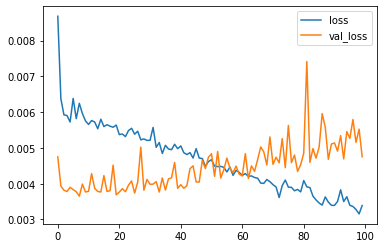

In [ ]:
# And then I can actually plot this out.

loss_df.plot()

# Typically in Neural Network training, you start of with a very high loss during your first couple of epoch runs.
# And then, as your weights and biases are starting to adjusting, you hopefully see kind of a steady but steep decline
# in your loss, or your error. And eventually, it will level off where you are not really doing any sort of improvements
# as you train more and more.

# I can directly compare the plot behavior of my "blue" training loss, versus my "orange" validation loss.
# We want a signal where it is decreasing, both the training loss and the validation loss.
# And then there should be no increase in in the validation set.
# Actually, what that means technically, we could have continued training.
# If the validation loss is also going down, that is an indicator that we could continue training without overfitting to our training data.

# If you saw this orange line begin to spike after some of these epochs, so it is starting to go up and up and up,
# that means that you are overtraining to the training data, because now you have a much larger loss on your validation data.

### Second option to prevent overfitting

In [ ]:
model_2 = Sequential()

model_2.add(Dense(113,activation='relu')) 
model_2.add(Dense(56,activation='relu'))
model_2.add(Dense(28,activation='relu')) 
# model.add(Dense(113,activation='relu')) 

model_2.add(Dense(1))

model_2.compile(optimizer='adam',loss='mse')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# help(EarlyStopping)
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:


model_2.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=1, epochs=100, callbacks=[early_stop])

Epoch 1/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0105 - val_loss: 0.0133
Epoch 2/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0043
Epoch 3/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0054
Epoch 4/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0075 - val_loss: 0.0040
Epoch 5/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0042
Epoch 6/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0039
Epoch 7/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 0.0047
Epoch 8/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0063 - val_loss: 0.0039
Epoch 9/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0076 - val_loss: 0.0040
Epoch 10/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0072 - val_lo

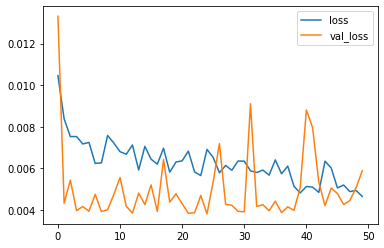

In [ ]:
model_loss = pd.DataFrame(model_2.history.history)
model_loss.plot()

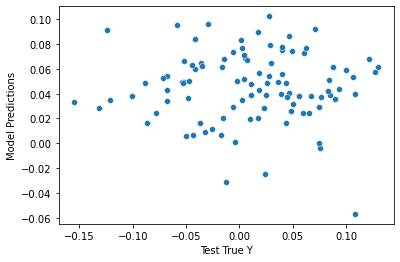

In [ ]:
model_2.evaluate(X_test, y_test, verbose=0)
model_2.evaluate(X_train, y_train, verbose=0)
test_predictions = model_2.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(98,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# So, what I could do is say, create a scatterplot, based of this data in my prediction dataframe.
sns.scatterplot(x='Test True Y', y='Model Predictions', data = pred_df)

# And we see this result

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score, r2_score

MAE_2 = mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
MSE_2 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])
r_squared_2 = r2_score(y_test, test_predictions)
print(r_squared_2)
print(MAE_2)
print(MSE_2)

-0.5539601975444106
0.062016103
0.005882178


### Third option to prevent overfitting

In [ ]:
# The third thing we can do to prevent overfitting, is to add "dropout-layers".
# So, drop-out layers will essentially turn of a percentage of neurons randomly.

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.metrics import Accuracy

In [ ]:
model_3 = Sequential()

model_3.add(Dense(113,activation='relu')) 
model_3.add(Dropout(0.25)) # half of (25%) these neurons will be turned of randomly during each batch

model_3.add(Dense(56,activation='relu')) 
model_3.add(Dropout(0.25)) # half of (25%) these neurons will be turned of randomly during each batch

model_3.add(Dense(28,activation='relu')) 
model_3.add(Dropout(0.25)) # half of (25%) these neurons will be turned of randomly during each batch

# model.add(Dense(56,activation='relu')) 
# model.add(Dropout(0.3)) # half of (50%) these neurons will be turned of randomly during each batch


model_3.add(Dense(1))

model_3.compile(optimizer='adam',loss='mse')

In [ ]:
model_3.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=1, epochs=100, callbacks=[early_stop])

Epoch 1/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0403 - val_loss: 0.0048
Epoch 2/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0106 - val_loss: 0.0039
Epoch 3/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0071 - val_loss: 0.0040
Epoch 4/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0069 - val_loss: 0.0039
Epoch 5/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0061 - val_loss: 0.0038
Epoch 6/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0065 - val_loss: 0.0038
Epoch 7/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0038
Epoch 8/100
226/226 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 0.0038
Epoch 9/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0058 - val_loss: 0.0038
Epoch 10/100
226/226 [==============================] - 1s 2ms/step - loss: 0.0061 - val_lo

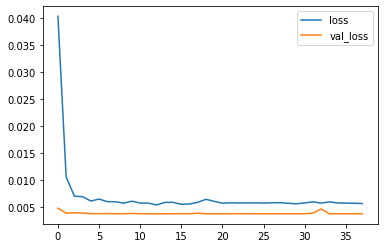

In [ ]:
model_loss = pd.DataFrame(model_3.history.history)
model_loss.plot()

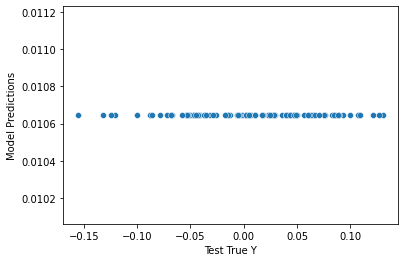

In [ ]:
model_3.evaluate(X_test, y_test, verbose=0)
model_3.evaluate(X_train, y_train, verbose=0)
test_predictions = model_3.predict(X_test)
test_predictions = pd.Series(test_predictions.reshape(98,))
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])
pred_df = pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

# So, what I could do is say, create a scatterplot, based of this data in my prediction dataframe.
sns.scatterplot(x='Test True Y', y='Model Predictions', data = pred_df)

# And we see this result

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score, r2_score

MAE_3 = mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
MSE_3 = mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])
r_squared_3 = r2_score(y_test, test_predictions)
print(r_squared_3)
print(MAE_3)
print(MSE_3)

-0.0002499146375662953
0.049959153
0.0037862284


### Model evaluation

In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

In [ ]:
# predictions = model.predict(X_test)

In [ ]:
# mean_squared_error(y_test,predictions)

In [ ]:
# np.sqrt(mean_squared_error(y_test,predictions))

In [ ]:
# mean_absolute_error(y_test,predictions)

In [ ]:
model.evaluate(X_test, y_test, verbose=0) # This returns back the models loss

# So, what this number actually represents is the metric loss that you decided on.
# And in in our case, that is Mean Squared Error (MSE)

# So, what this means is, on the test set, that is data it has never seen before,
# it is getting back a Mean Squared Error (MSE) of 0.006197

In [ ]:
# So, we can do the same thing on our training set

model.evaluate(X_train, y_train, verbose=0)

# And, we see the loss on our training set.

# So, what does this mean? It means that we can interpret our results to see how well our
# predictions are actually performing

In [ ]:
test_predictions = model.predict(X_test)

In [ ]:
test_predictions = pd.Series(test_predictions.reshape(98,))

In [ ]:
test_predictions

In [ ]:
pred_df = pd.DataFrame(y_test, columns=['Test True Y'])

In [ ]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [ ]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [ ]:
# So here, I can directly see, based on my Test set, what the true return value was,
# and what my model predicted.

pred_df

In [ ]:
# So, what I could do is say, create a scatterplot, based of this data in my prediction dataframe.
sns.scatterplot(x='Test True Y', y='Model Predictions', data = pred_df)

# And we see this result

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score, r2_score

In [ ]:
# Mean absolute error
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

In [ ]:
# data_norway.describe()

In [ ]:
# Mean squared error
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

In [ ]:
# Root mean squared error
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

In [ ]:
explained_variance_score(y_test, test_predictions)

In [ ]:
r2_score(y_test, test_predictions)

In [ ]:
# What we can also compare is our predictions, and we can plot them out, against a perfect fit.

plt.figure(figsize=(12,6))
plt.scatter(y_test, test_predictions)
plt.plot(y_test,y_test,'red')

# The red line represents the perfect prediction line.
# We notice that we are being punished here by these outliers.

# What may be worth, is to retrain our model just on that bottom 99 % of these returns.
# And so, if come up to a situation where our returns is 10% for example, we will just say sorry, our model is not good enough for this.
# And we will only refit to the bottom of that 99%.

# Again, it depends on the type of context and what question you are trying to answer, or what problem we are trying to solve.

In [ ]:
model.summary()